## Table of Contents
* [Set-up](#Setup)
    * [Load libraries](#Load_libraries)
    * [Setup for plot labels](#Setup_for_plot_labels)
    * [Setup labels](#Setup_labels)
    * [Declare conflict preferences](#Declare_conflict_preferences)
* [Create phyloseq object](#Create_phyloseq_object)
    * [Abundance filter](#Abundance_filter)
* [Alpha diversity](#Alpha_diversity_analyses)
    * [Composition plots](#Composition_plots)
    * [Richness estimates](#Richness_estimates)
    * [Statistics on richness estimates](#Statistics_on_richness_estimates)
* [Beta diversity](#Beta_diversity)
    * [Ordination matrices](#Ordination_matrices)
    * [Ordination plots](#Ordination_plots)
    * [Statistics on group distances](#Statistics)
    * [Map alpha diversity into ordination](#Color_by_alpha_diversity)

### Setup

#### Load libraries

In [1]:
library(plyr)
library(tidyverse)
library(stringr)
library(phyloseq)
library(microViz)
library(metagMisc)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(permute)
library(grid) 
library(knitr)
library(cowplot)
library(vegan)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
ℹ Use t

In [2]:
opts_chunk$set(cache=FALSE,warning=FALSE)

#### Setup for plot labels

In [3]:
#Setup for plot labels
#options(repr.matrix.max.cols = Inf)

In [4]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

#### Declare conflict preferences

In [5]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


#### Source functions

In [6]:
#Import functions for plots
source("../FlagellinDiversity/plots_functions.r")

## 1. Import phyloseq object

In [7]:
psAll_count = readRDS("subsampled_option2.rds")

In [8]:
#saveRDS(psAll,"psAll.rds")
#saveRDS(psAll_count,"psAll_count.rds")

## 2. Abundance filtering

In [9]:
filter_taxa_All = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")

#Retain only samples with a total count greater than zero
filter_taxa_All=prune_samples(sample_sums(filter_taxa_All)>0,filter_taxa_All)

In [10]:
filter_taxa_All

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 443 samples ]
sample_data() Sample Data:       [ 443 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [11]:
#Filter based on prevalence
#Prevalence threshold=0.05
#Prevalence threshold=0.01
#Prevalence threshold=0.001

filter_taxa_All_count = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")

#Retain only samples with a total count greater than zero
filter_taxa_All_count=prune_samples(sample_sums(filter_taxa_All_count)>0,filter_taxa_All_count)

In [12]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 443 samples ]
sample_data() Sample Data:       [ 443 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [13]:
saveRDS(filter_taxa_All_count,"filter_taxa_All_count_subsampled.opt2.rds")

In [14]:
count(as_tibble(filter_taxa_All_count@sam_data),category)

category      n  
1 Animal        269
2 Environmental  99
3 Plants         75

In [15]:
#write.tree(filter_taxa_All_count@phy_tree,"edgeR/filterTaxa_Allcount.tre")

In [16]:
# Flagellins in plants
flas.plants = ps_filter(filter_taxa_All_count,category=="Plants")
flas.present.plants = phyloseq_filter_prevalence(flas.plants, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.plants@phy_tree,"edgeR/flags.tre_Plants.tre")

In [17]:
# Flagellins in animals
flas.animals = ps_filter(filter_taxa_All_count,category=="Animal")
flas.present.animals = phyloseq_filter_prevalence(flas.animals, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.animals@phy_tree,"edgeR/flags.tre_Animals.tre")

In [18]:
# Flagellins in environmental
flas.env = ps_filter(filter_taxa_All_count,category=="Environmental")
flas.present.env = phyloseq_filter_prevalence(flas.env, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.env@phy_tree,"edgeR/flags.tre_Env.tre")

In [19]:
#saveRDS(filter_taxa_All,"filter_taxa_All.rds")
#saveRDS(filter_taxa_All_count,"filter_taxa_All_count.rds")

## 2. Alpha diversity analyses

### Composition plots

In [20]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 443 samples ]
sample_data() Sample Data:       [ 443 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [21]:
top.100=phyloseq_filter_top_taxa(filter_taxa_All_count,n=100)
top.30=phyloseq_filter_top_taxa(filter_taxa_All_count,n=30)

In [22]:
top.100.barplot=plot_bar(transform_sample_counts(top.100, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 100 taxa")

top.30.barplot=plot_bar(transform_sample_counts(top.30, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 30 taxa")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


Warning message:
“Removed 600 rows containing missing values (position_stack).”
Warning message:
“Removed 600 rows containing missing values (position_stack).”
Warning message:
“Removed 270 rows containing missing values (position_stack).”
Warning message:
“Removed 270 rows containing missing values (position_stack).”


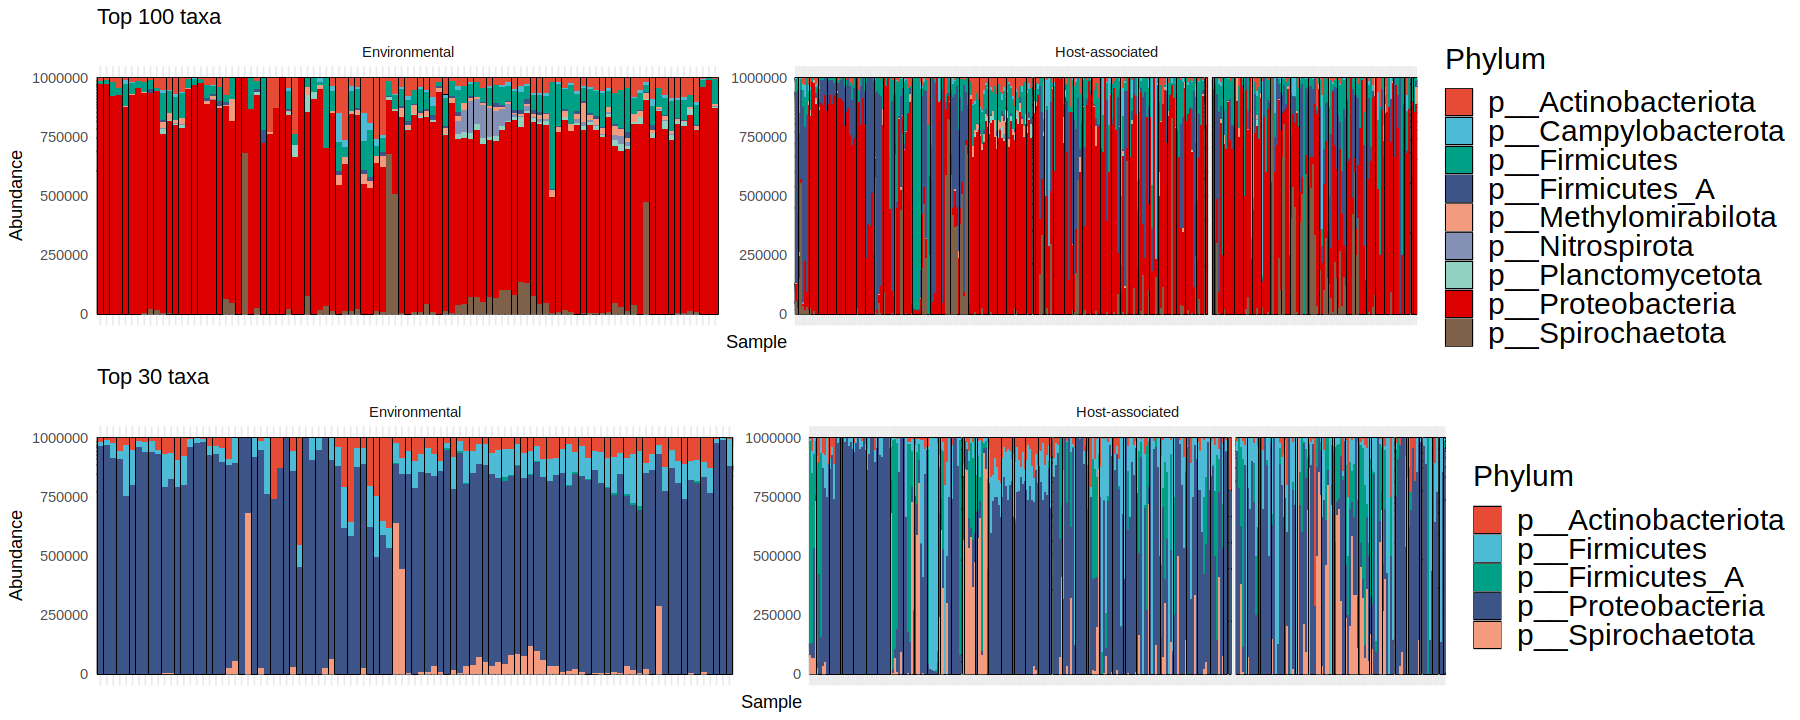

In [23]:
options(repr.plot.width=15,repr.plot.height=6)
grid.arrange(top.100.barplot,
             top.30.barplot,
             nrow=2)

### Richness estimates

In [24]:
richness.estimates=mutate(as_tibble(filter_taxa_All_count@sam_data),estimate_richness(filter_taxa_All_count, split = TRUE, measures = c("Observed", "Chao1","Shannon", "Simpson")))

In [25]:
head(richness.estimates)

Sample     Dataset      biome_0 biome_1         biome_2       
1 ERS1065341 MGYS00000631 root    Host-associated Mammalia      
2 ERS1353919 MGYS00001254 root    Host-associated Mammalia      
3 ERS1353922 MGYS00001254 root    Host-associated Mammalia      
4 ERS1474385 MGYS00001380 root    Host-associated Mammalia      
5 ERS1579927 MGYS00001583 root    Host-associated Actinopterygii
6 ERS1579933 MGYS00001583 root    Host-associated Actinopterygii
  biome_3          biome_4         family     category mammals  Observed
1 Digestive system Stomach         Bovidae    Animal   Mammalia 605     
2 Digestive system Large intestine Cricetidae Animal   Mammalia 411     
3 Digestive system Large intestine Cricetidae Animal   Mammalia 398     
4 Digestive system Fecal           Muridae    Animal   Mammalia 175     
5 Digestive system Foregut         Salmonidae Animal   Others    11     
6 Digestive system Foregut         Salmonidae Animal   Others    14     
  Chao1    se.chao1  Shannon  Simpson  
1 962.6164 65.796443 5.132902 0.9870500
2 629.3333 53.628122 4.293173 0.9487211
3 560.5556 37.994061 4.708263 0.9656202
4 229.4737 21.590704 4.197060 0.9731164
5  16.0000  5.502525 1.975403 0.7959184
6  16.5000  2.891158 1.751929 0.6597463

### Statistics on richness estimates

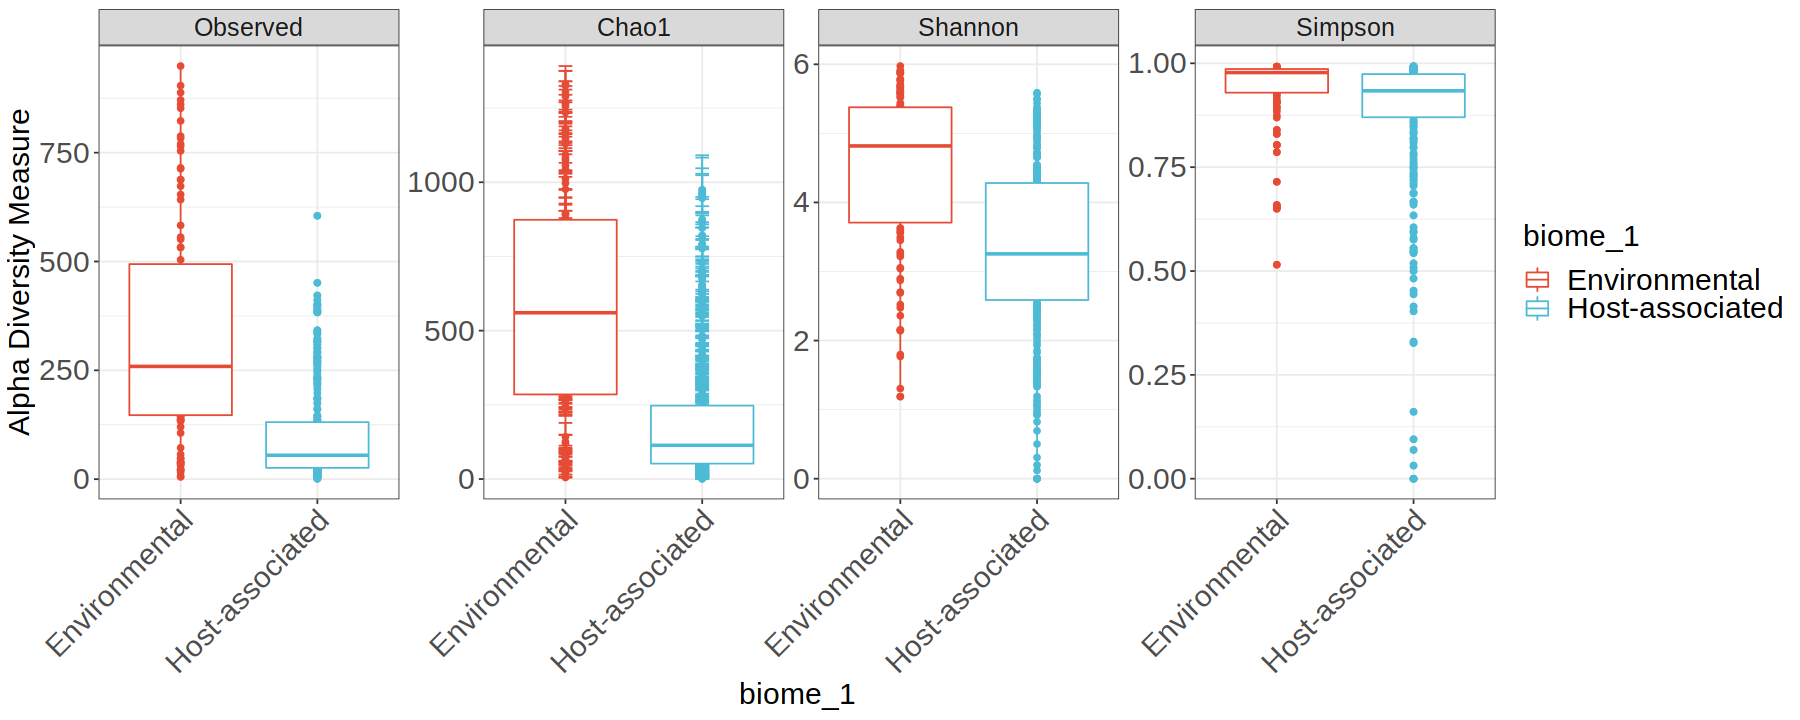

In [26]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

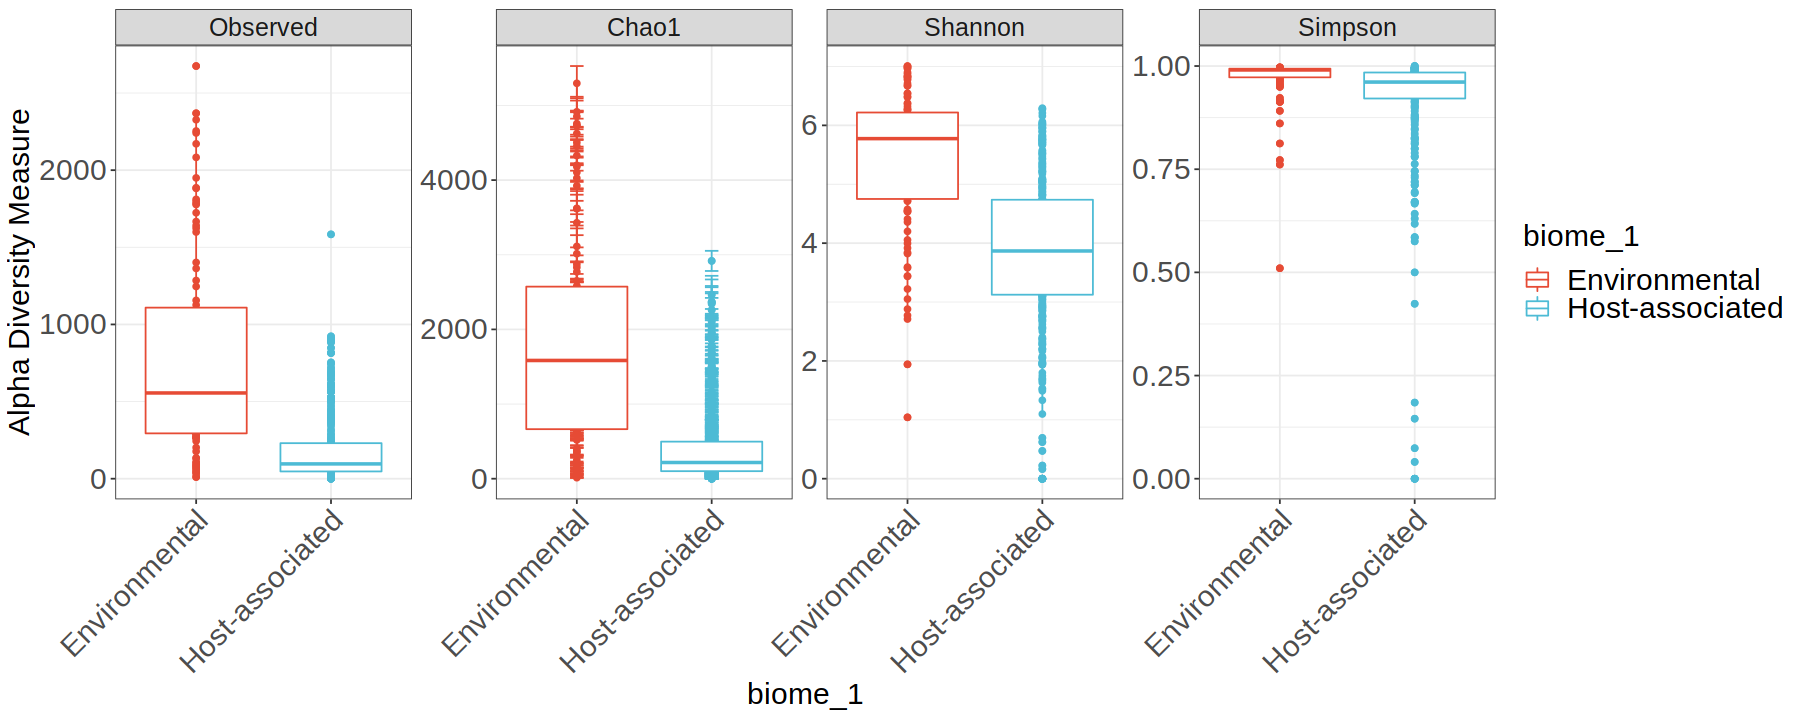

In [27]:
#Without performing abundance filter
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(psAll_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### I. Kruskal tests by biome_1

In [28]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_1)

biome_1         n  
1 Environmental    99
2 Host-associated 344

In [29]:
kruskal.test(Observed~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by biome_1
Kruskal-Wallis chi-squared = 86.742, df = 1, p-value < 2.2e-16


In [30]:
kruskal.test(Chao1~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_1
Kruskal-Wallis chi-squared = 92.566, df = 1, p-value < 2.2e-16


In [31]:
kruskal.test(Shannon~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_1
Kruskal-Wallis chi-squared = 62.326, df = 1, p-value = 2.911e-15


In [32]:
kruskal.test(Simpson~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_1
Kruskal-Wallis chi-squared = 26.844, df = 1, p-value = 2.205e-07


#### II. Kruskal tests by category

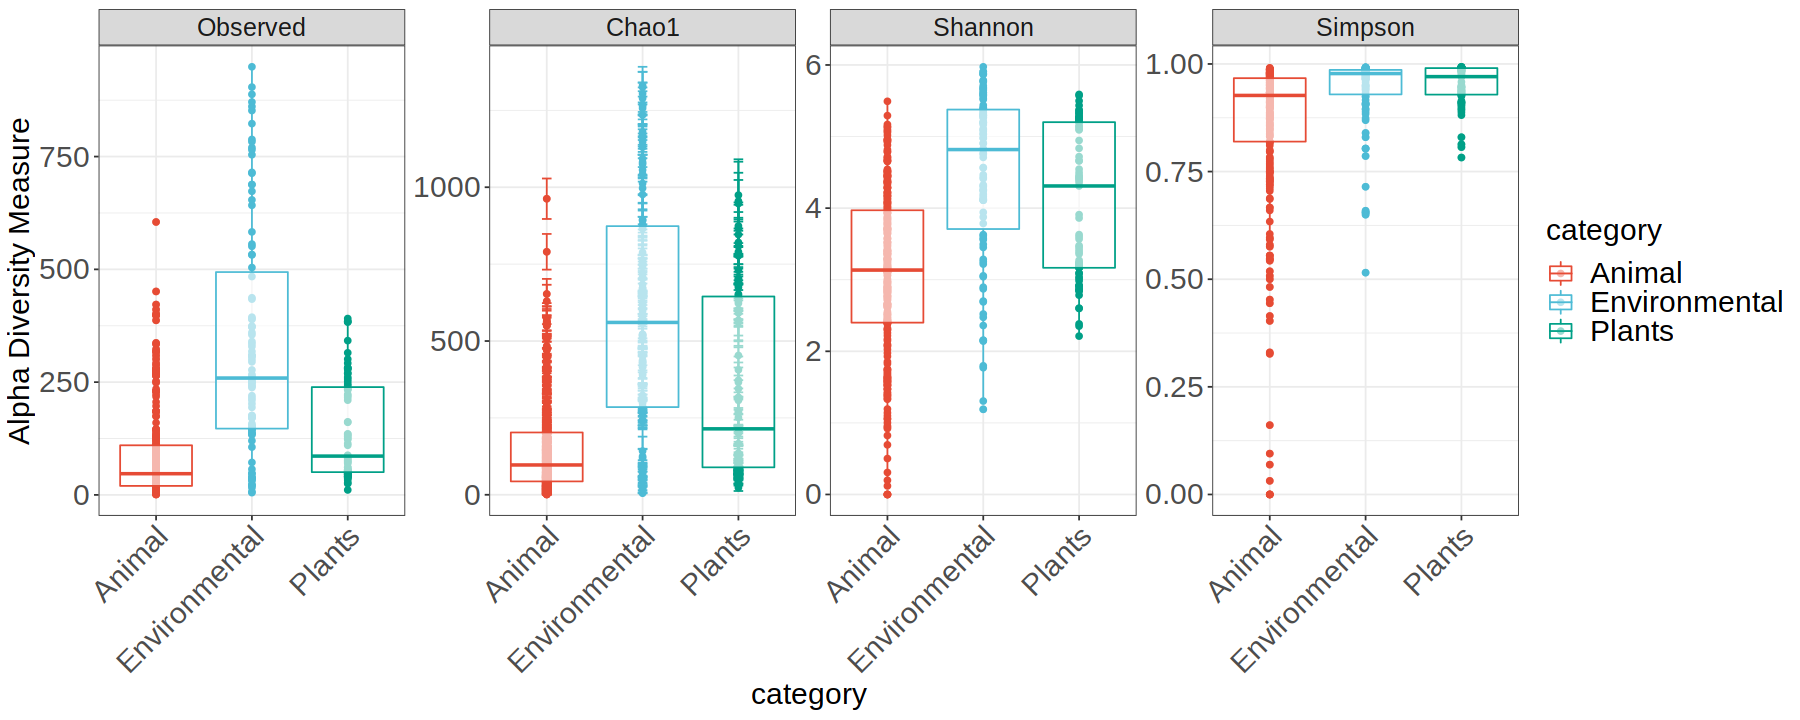

In [33]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
theme_bw()+
geom_boxplot(alpha=0.6)+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

In [34]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_2)

biome_2        n  
1 Actinopterygii  18
2 Amphibia        11
3 Aquatic         69
4 Aves            63
5 Mammalia       163
6 Plants          75
7 Reptilia        14
8 Terrestrial     30

In [35]:
kruskal.test(Observed~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 106.54, df = 2, p-value < 2.2e-16


In [36]:
kruskal.test(Chao1~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 121.67, df = 2, p-value < 2.2e-16


In [37]:
kruskal.test(Shannon~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 94.891, df = 2, p-value < 2.2e-16


In [38]:
kruskal.test(Simpson~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 67.805, df = 2, p-value = 1.889e-15


#### III. Wilcoxon tests by category

In [39]:
pairwise.wilcox.test(richness.estimates$Observed, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Observed and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        8.9e-07 6.8e-07      

P value adjustment method: fdr 

In [40]:
pairwise.wilcox.test(richness.estimates$Chao1, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Chao1 and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        3.9e-08 7.2e-05      

P value adjustment method: fdr 

In [41]:
pairwise.wilcox.test(richness.estimates$Shannon, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Shannon and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        4.1e-09 0.0085       

P value adjustment method: fdr 

In [42]:
pairwise.wilcox.test(richness.estimates$Simpson, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Simpson and richness.estimates$category 

              Animal Environmental
Environmental 4e-11  -            
Plants        1e-09  0.35         

P value adjustment method: fdr 

## 3. Beta diversity

Add alpha diversity measures to samples data. Then include it to the phyloseq object

In [43]:
#tmp mapping table with richness estimates
mapping_ps_All_richness=sample_data(richness.estimates)
rownames(mapping_ps_All_richness)=richness.estimates$Sample

filter_taxa_All_count=phyloseq(filter_taxa_All_count@otu_table,mapping_ps_All_richness,filter_taxa_All@tax_table,filter_taxa_All@phy_tree)
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 443 samples ]
sample_data() Sample Data:       [ 443 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [44]:
head(filter_taxa_All_count@sam_data)

Sample     Dataset      biome_0 biome_1         biome_2       
ERS1065341 ERS1065341 MGYS00000631 root    Host-associated Mammalia      
ERS1353919 ERS1353919 MGYS00001254 root    Host-associated Mammalia      
ERS1353922 ERS1353922 MGYS00001254 root    Host-associated Mammalia      
ERS1474385 ERS1474385 MGYS00001380 root    Host-associated Mammalia      
ERS1579927 ERS1579927 MGYS00001583 root    Host-associated Actinopterygii
ERS1579933 ERS1579933 MGYS00001583 root    Host-associated Actinopterygii
           biome_3          biome_4         family     category mammals 
ERS1065341 Digestive system Stomach         Bovidae    Animal   Mammalia
ERS1353919 Digestive system Large intestine Cricetidae Animal   Mammalia
ERS1353922 Digestive system Large intestine Cricetidae Animal   Mammalia
ERS1474385 Digestive system Fecal           Muridae    Animal   Mammalia
ERS1579927 Digestive system Foregut         Salmonidae Animal   Others  
ERS1579933 Digestive system Foregut         Salmonidae Animal   Others  
           Observed Chao1    se.chao1  Shannon  Simpson  
ERS1065341 605      962.6164 65.796443 5.132902 0.9870500
ERS1353919 411      629.3333 53.628122 4.293173 0.9487211
ERS1353922 398      560.5556 37.994061 4.708263 0.9656202
ERS1474385 175      229.4737 21.590704 4.197060 0.9731164
ERS1579927  11       16.0000  5.502525 1.975403 0.7959184
ERS1579933  14       16.5000  2.891158 1.751929 0.6597463

### Ordination matrices

In [45]:
#Distance matrices for anosim
jaccard.dist = distance(filter_taxa_All_count,method="jaccard",type="samples")
unifrac.dist = distance(filter_taxa_All_count,method="unifrac",type="samples")
bray.dist = distance(filter_taxa_All_count,method="bray",type="samples")
wunifrac.dist = distance(filter_taxa_All_count,method="wunifrac",type="samples")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”


In [46]:
unifrac.dist.filt = ordinate(filter_taxa_All_count,distance="unifrac",method="PCoA")
wunifrac.dist.filt = ordinate(filter_taxa_All_count,distance="wunifrac",method="PCoA")
jaccard.dist.filt = ordinate(filter_taxa_All_count,distance="jaccard",method="PCoA")
bray.dist.filt = ordinate(filter_taxa_All_count,distance="bray",method="PCoA")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”


### Ordination plots

#### By biome 1

In [47]:
jaccard.plot = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"biome_1")
bray.plot = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"biome_1")
unifrac.plot = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"biome_1")
wunifrac.plot = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"biome_1")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


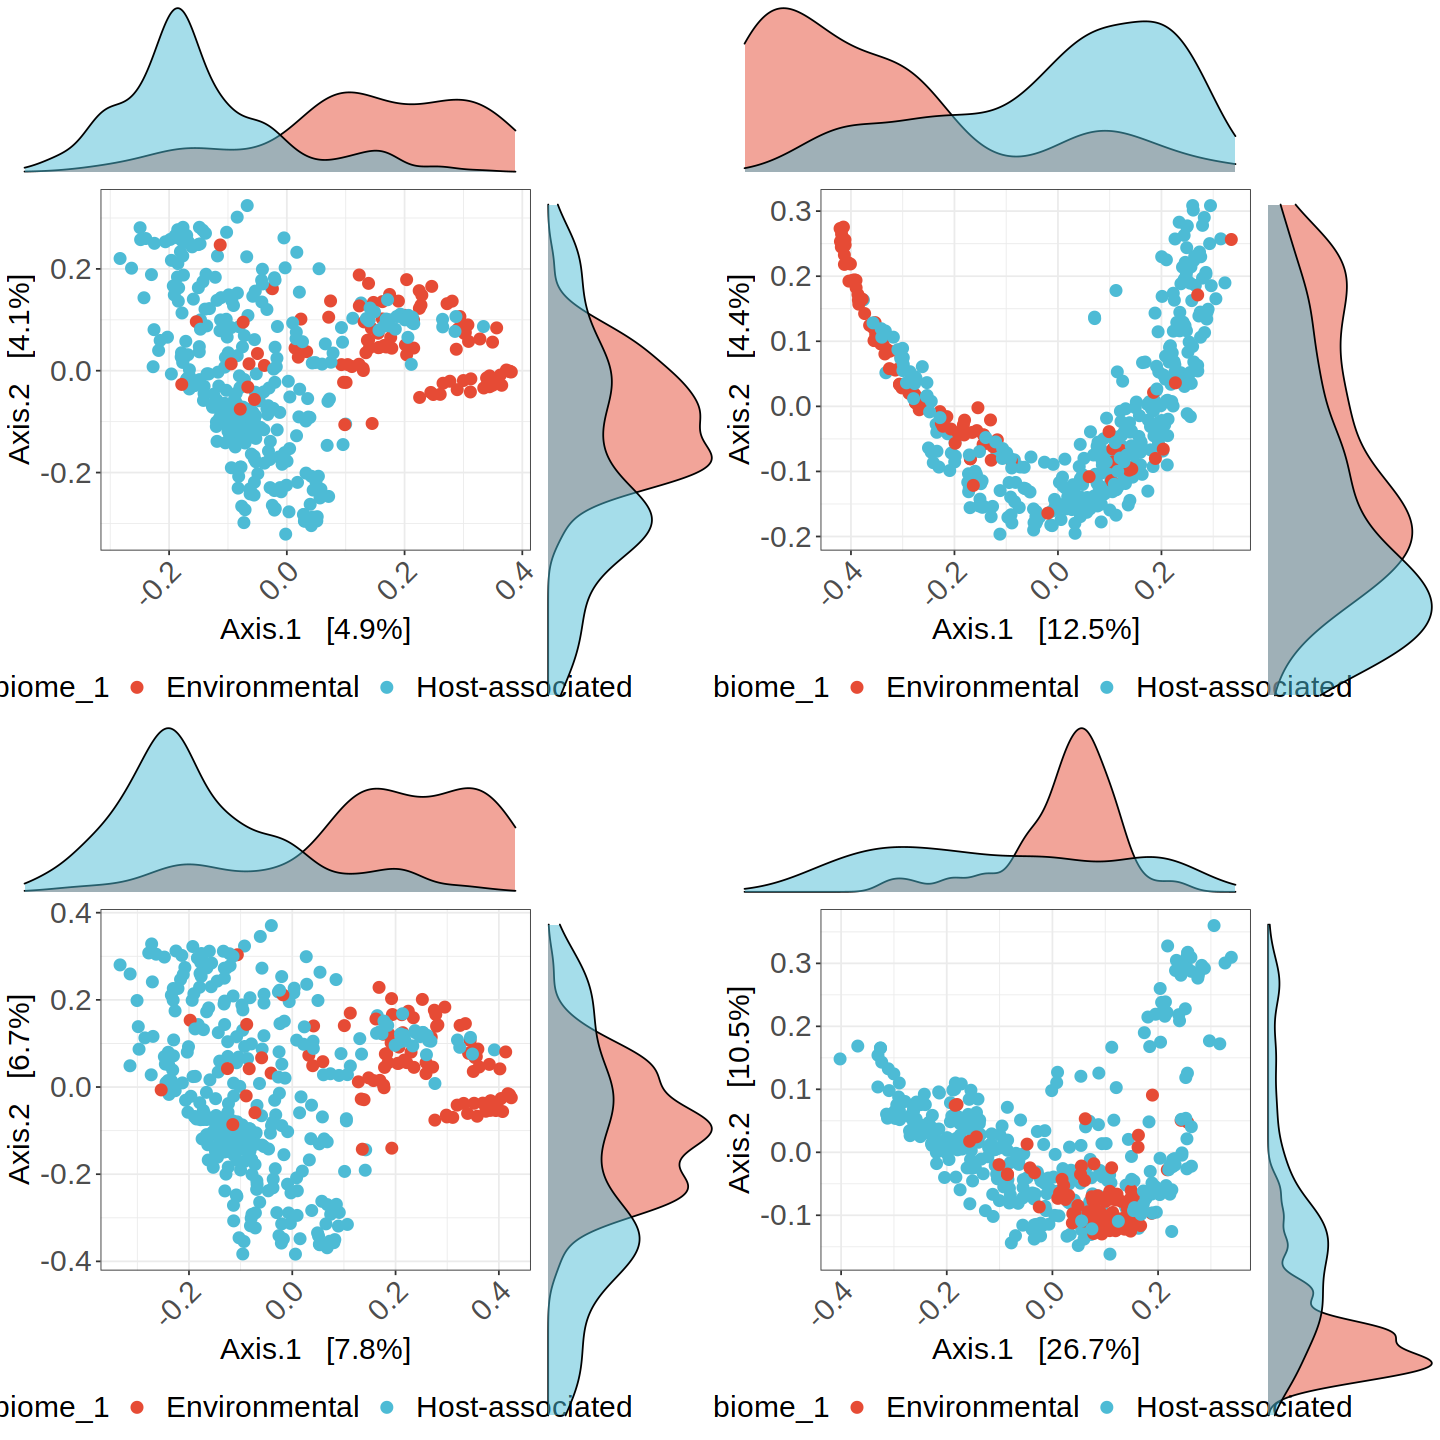

In [48]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot,"biome_1",richness.estimates),
            nrow=2)


##### ANOSIM

In [49]:
biome_1.var = get_variable(filter_taxa_All_count,"biome_1")

In [50]:
biome1.anosim.jacc = anosim(jaccard.dist,biome_1.var)
biome1.anosim.unifrac = anosim(unifrac.dist,biome_1.var)
biome1.anosim.bray = anosim(bray.dist,biome_1.var)
biome1.anosim.wunifrac = anosim(wunifrac.dist,biome_1.var)

In [51]:
anosim.results = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome1.anosim.jacc$signif,biome1.anosim.jacc$statistic),
    "bray" = c(biome1.anosim.bray$signif,biome1.anosim.bray$statistic),
    "unifrac" = c(biome1.anosim.unifrac$signif,biome1.anosim.unifrac$statistic),
    "wunifrac" = c(biome1.anosim.wunifrac$signif,biome1.anosim.wunifrac$statistic))

In [52]:
anosim.results

col          jaccard     bray        unifrac   wunifrac  
1 significance  0.99800000  1.00000000 0.0010000  1.0000000
2 R_statistic  -0.07903629 -0.07903629 0.1005753 -0.0988558

##### Wilcoxon on PCoA axis

In [53]:
#Get ordination vectors
ord.vectors = list(jaccard.vector = getOrdinationVectors(jaccard.dist.filt,richness.estimates),
    bray.vector = getOrdinationVectors(bray.dist.filt,richness.estimates),
    unifrac.vector = getOrdinationVectors(unifrac.dist.filt,richness.estimates), 
    wunifrac.vector = getOrdinationVectors(wunifrac.dist.filt,richness.estimates))

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


In [54]:
ord.wilcoxon.list.biome1 = lapply(ord.vectors,wilcoxonOrdinationAxis,"biome_1")

In [55]:
wilcoxon.axis.stats.biome1 <- rbind(
  ord.wilcoxon.list.biome1[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.biome1[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.biome1[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.biome1[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [56]:
wilcoxon.axis.stats.biome1

axis1.Animal axis1.Environmental axis2.Animal
Environmental  1.313140e-35           NA        8.693625e-15
Plants         3.950361e-03 1.908835e-10        6.310965e-21
Environmental1 6.259559e-36           NA        3.397901e-12
Plants1        2.344547e-05 1.659166e-10        7.319430e-20
Environmental2 2.036082e-29           NA        6.293570e-08
Plants2        3.910957e-09 4.575307e-08        1.823428e-02
Environmental3 4.492077e-24           NA        2.765825e-16
Plants3        1.499192e-33 5.074144e-20        8.367417e-04
               axis2.Environmental axis3.Animal axis3.Environmental
Environmental            NA        2.696151e-01           NA       
Plants         1.106110e-10        2.696151e-01 2.696151e-01       
Environmental1           NA        9.975753e-01           NA       
Plants1        1.681869e-11        9.975753e-01 9.975753e-01       
Environmental2           NA        8.536751e-12           NA       
Plants2        3.666669e-04        3.986369e-31 9.780698e-21       
Environmental3           NA        1.542672e-25           NA       
Plants3        1.384250e-13        2.295364e-10 1.510480e-03       
               axis4.Animal axis4.Environmental OrdMethod
Environmental  7.444311e-01           NA        Jaccard  
Plants         1.210685e-09 1.690273e-05        Jaccard  
Environmental1 9.050013e-01           NA        Bray     
Plants1        6.613454e-07 4.634070e-06        Bray     
Environmental2 7.764111e-01           NA        Unifrac  
Plants2        2.108019e-06 4.566070e-06        Unifrac  
Environmental3 3.762627e-03           NA        wUnifrac 
Plants3        6.949613e-04 1.023132e-02        wUnifrac

#### By category

In [57]:
jaccard.plot.cat = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"category")
bray.plot.cat = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"category")
unifrac.plot.cat = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"category")
wunifrac.plot.cat = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"category")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


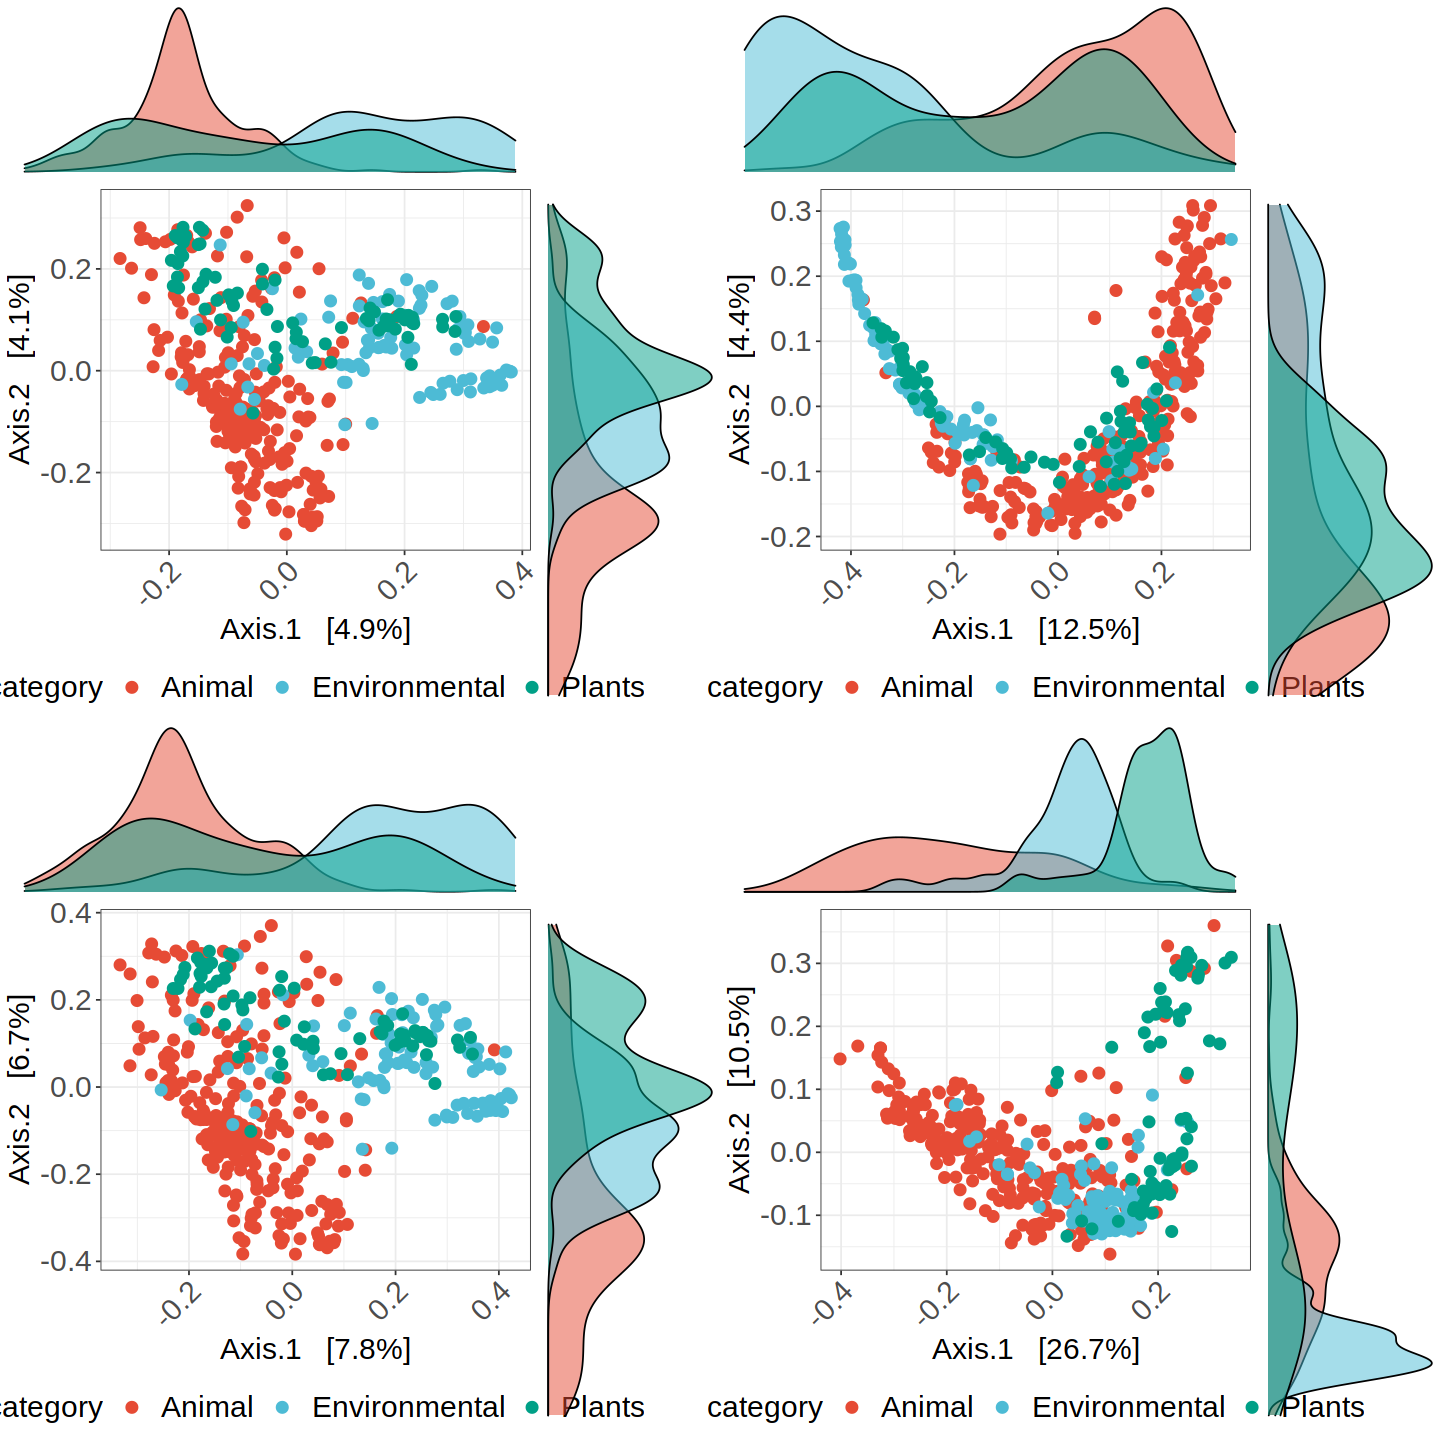

In [58]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.cat,"category",richness.estimates),
            nrow=2)


In [59]:
#Generate individual PCoA
#jaccard.pcoa.plot = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"category")

##### ANOSIM

In [60]:
category.var = get_variable(filter_taxa_All_count,"category")

In [61]:
cat.anosim.jacc = anosim(jaccard.dist,category.var)
cat.anosim.unifrac = anosim(unifrac.dist,category.var)
cat.anosim.bray = anosim(bray.dist,category.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,category.var)

In [62]:
anosim.results_cat = data.frame(
    "distance_method" = c("jaccard","bray","unifrac","wunifrac"),
    "R_statistic" = c(cat.anosim.jacc$statistic,cat.anosim.bray$statistic,cat.anosim.unifrac$statistic,cat.anosim.wunifrac$statistic),
    "significance" = c(cat.anosim.jacc$signif,cat.anosim.bray$signif,cat.anosim.unifrac$signif,cat.anosim.wunifrac$statistic)
    )

In [63]:
anosim.results_cat

distance_method R_statistic significance
1 jaccard         -0.02664602 0.8650000   
2 bray            -0.02664602 0.8470000   
3 unifrac          0.18025411 0.0010000   
4 wunifrac         0.19373350 0.1937335

##### Wilcoxon on PCoA axis

In [64]:
ord.wilcoxon.list = lapply(ord.vectors,wilcoxonOrdinationAxis,"category")

In [65]:
wilcoxon.axis.stats <- rbind(
  ord.wilcoxon.list[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [66]:
wilcoxon.axis.stats

axis1.Animal axis1.Environmental axis2.Animal
Environmental  1.313140e-35           NA        8.693625e-15
Plants         3.950361e-03 1.908835e-10        6.310965e-21
Environmental1 6.259559e-36           NA        3.397901e-12
Plants1        2.344547e-05 1.659166e-10        7.319430e-20
Environmental2 2.036082e-29           NA        6.293570e-08
Plants2        3.910957e-09 4.575307e-08        1.823428e-02
Environmental3 4.492077e-24           NA        2.765825e-16
Plants3        1.499192e-33 5.074144e-20        8.367417e-04
               axis2.Environmental axis3.Animal axis3.Environmental
Environmental            NA        2.696151e-01           NA       
Plants         1.106110e-10        2.696151e-01 2.696151e-01       
Environmental1           NA        9.975753e-01           NA       
Plants1        1.681869e-11        9.975753e-01 9.975753e-01       
Environmental2           NA        8.536751e-12           NA       
Plants2        3.666669e-04        3.986369e-31 9.780698e-21       
Environmental3           NA        1.542672e-25           NA       
Plants3        1.384250e-13        2.295364e-10 1.510480e-03       
               axis4.Animal axis4.Environmental OrdMethod
Environmental  7.444311e-01           NA        Jaccard  
Plants         1.210685e-09 1.690273e-05        Jaccard  
Environmental1 9.050013e-01           NA        Bray     
Plants1        6.613454e-07 4.634070e-06        Bray     
Environmental2 7.764111e-01           NA        Unifrac  
Plants2        2.108019e-06 4.566070e-06        Unifrac  
Environmental3 3.762627e-03           NA        wUnifrac 
Plants3        6.949613e-04 1.023132e-02        wUnifrac

#### By biome 2

In [67]:
jaccard.plot.biome2 = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"biome_2")
bray.plot.biome2 = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"biome_2")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


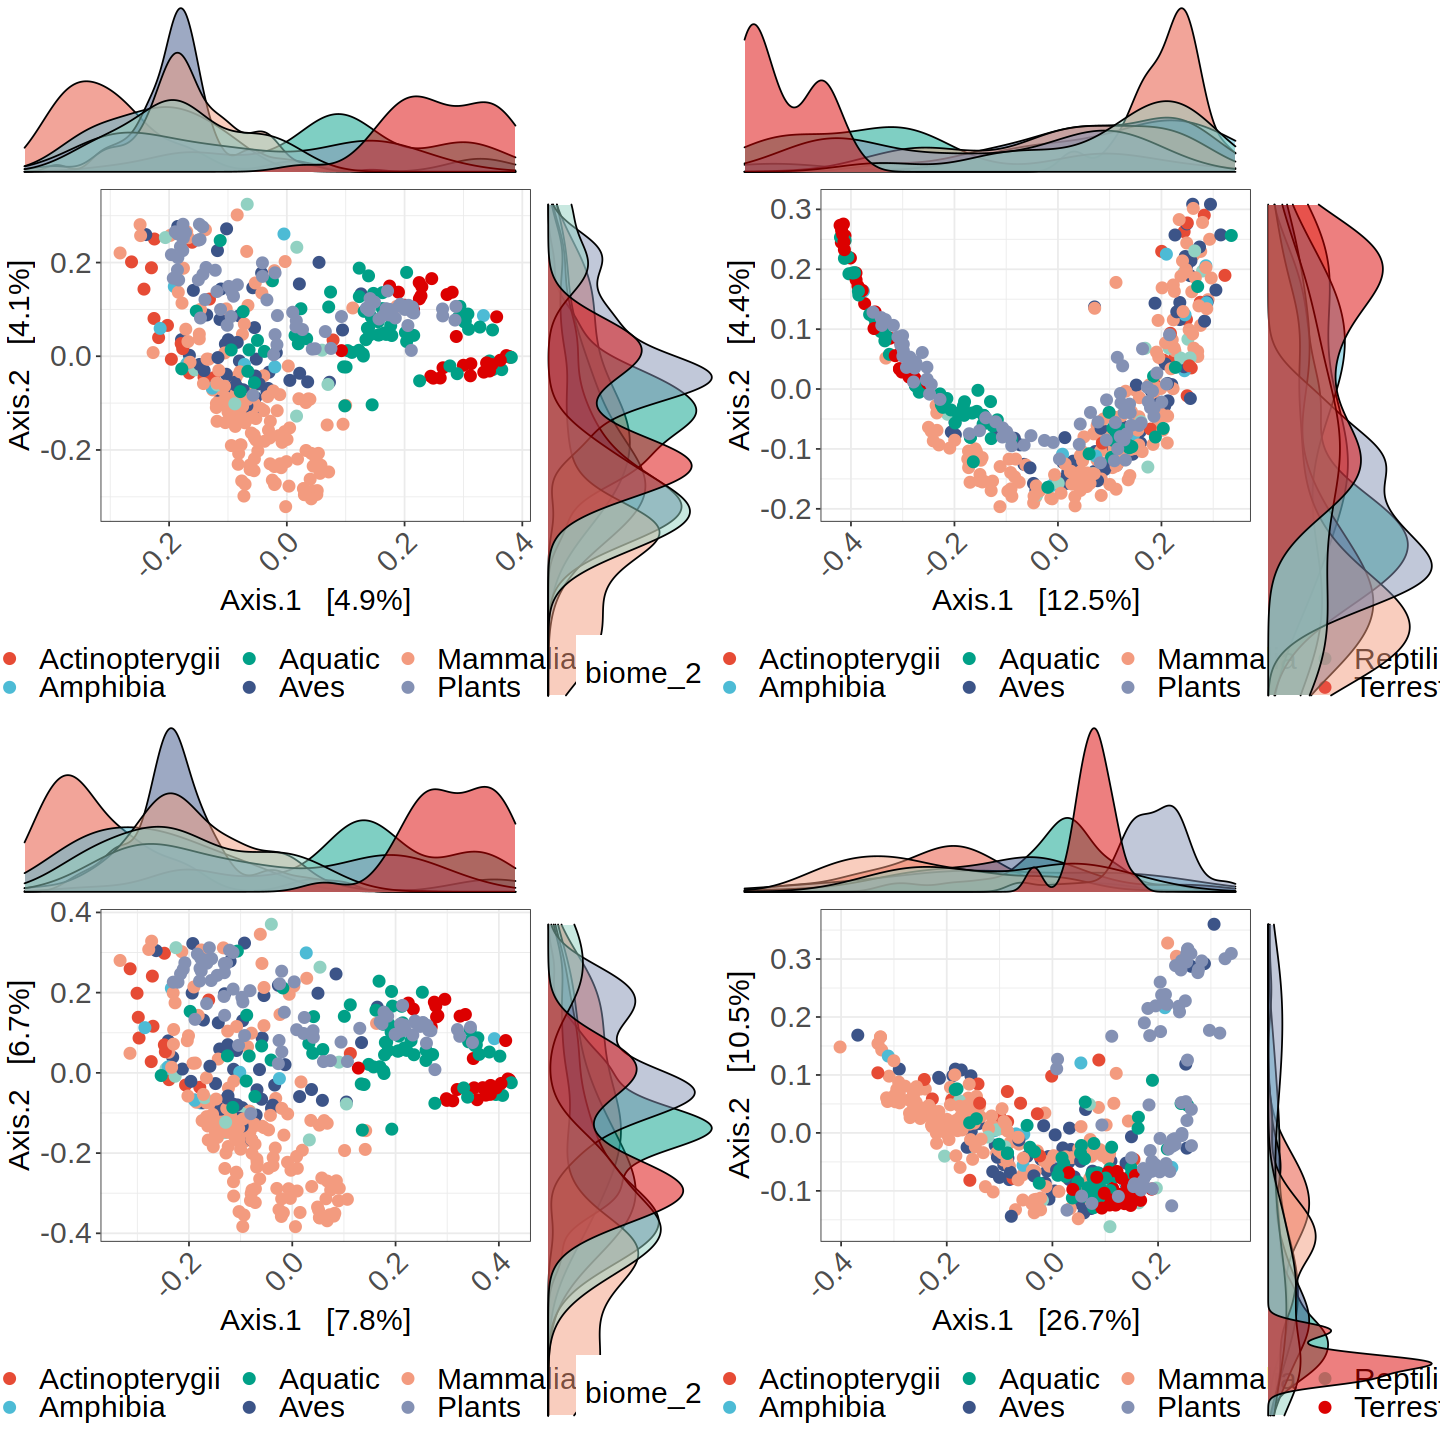

In [68]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.biome2,"biome_2",richness.estimates),
            nrow=2)


#### Map mammals

In [69]:
jaccard.plot.mammals = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"mammals")
bray.plot.mammals = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"mammals")
unifrac.plot.mammals = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"mammals")
wunifrac.plot.mammals = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"mammals")

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


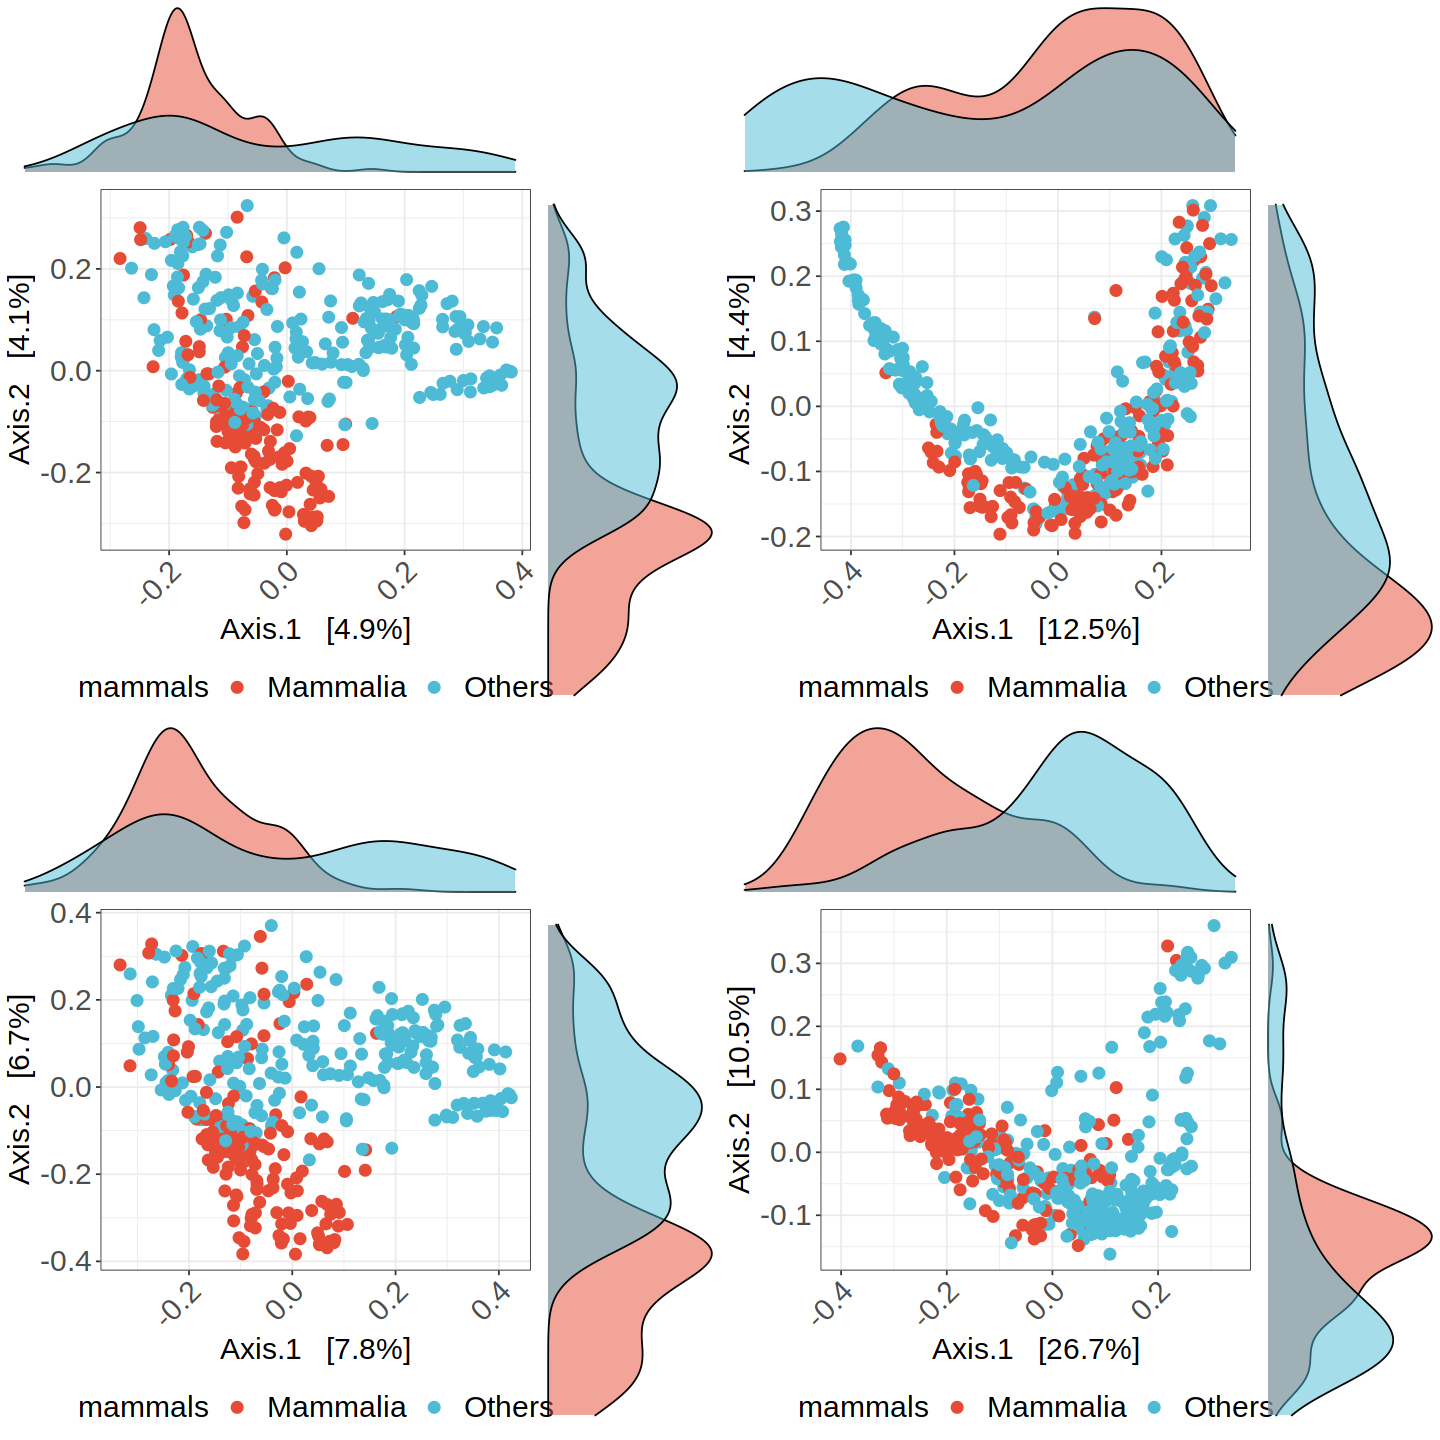

In [70]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.mammals,"mammals",richness.estimates),
            nrow=2)


#### Color by alpha diversity

In [71]:
#Generate plots - coloring by Shannon index
jaccard.shannon = plot_color_continuous(filter_taxa_All_count,jaccard.dist.filt,"Shannon")
bray.shannon = plot_color_continuous(filter_taxa_All_count,bray.dist.filt,"Shannon")
unifrac.shannon = plot_color_continuous(filter_taxa_All_count,unifrac.dist.filt,"Shannon")
wunifrac.shannon = plot_color_continuous(filter_taxa_All_count,wunifrac.dist.filt,"Shannon")

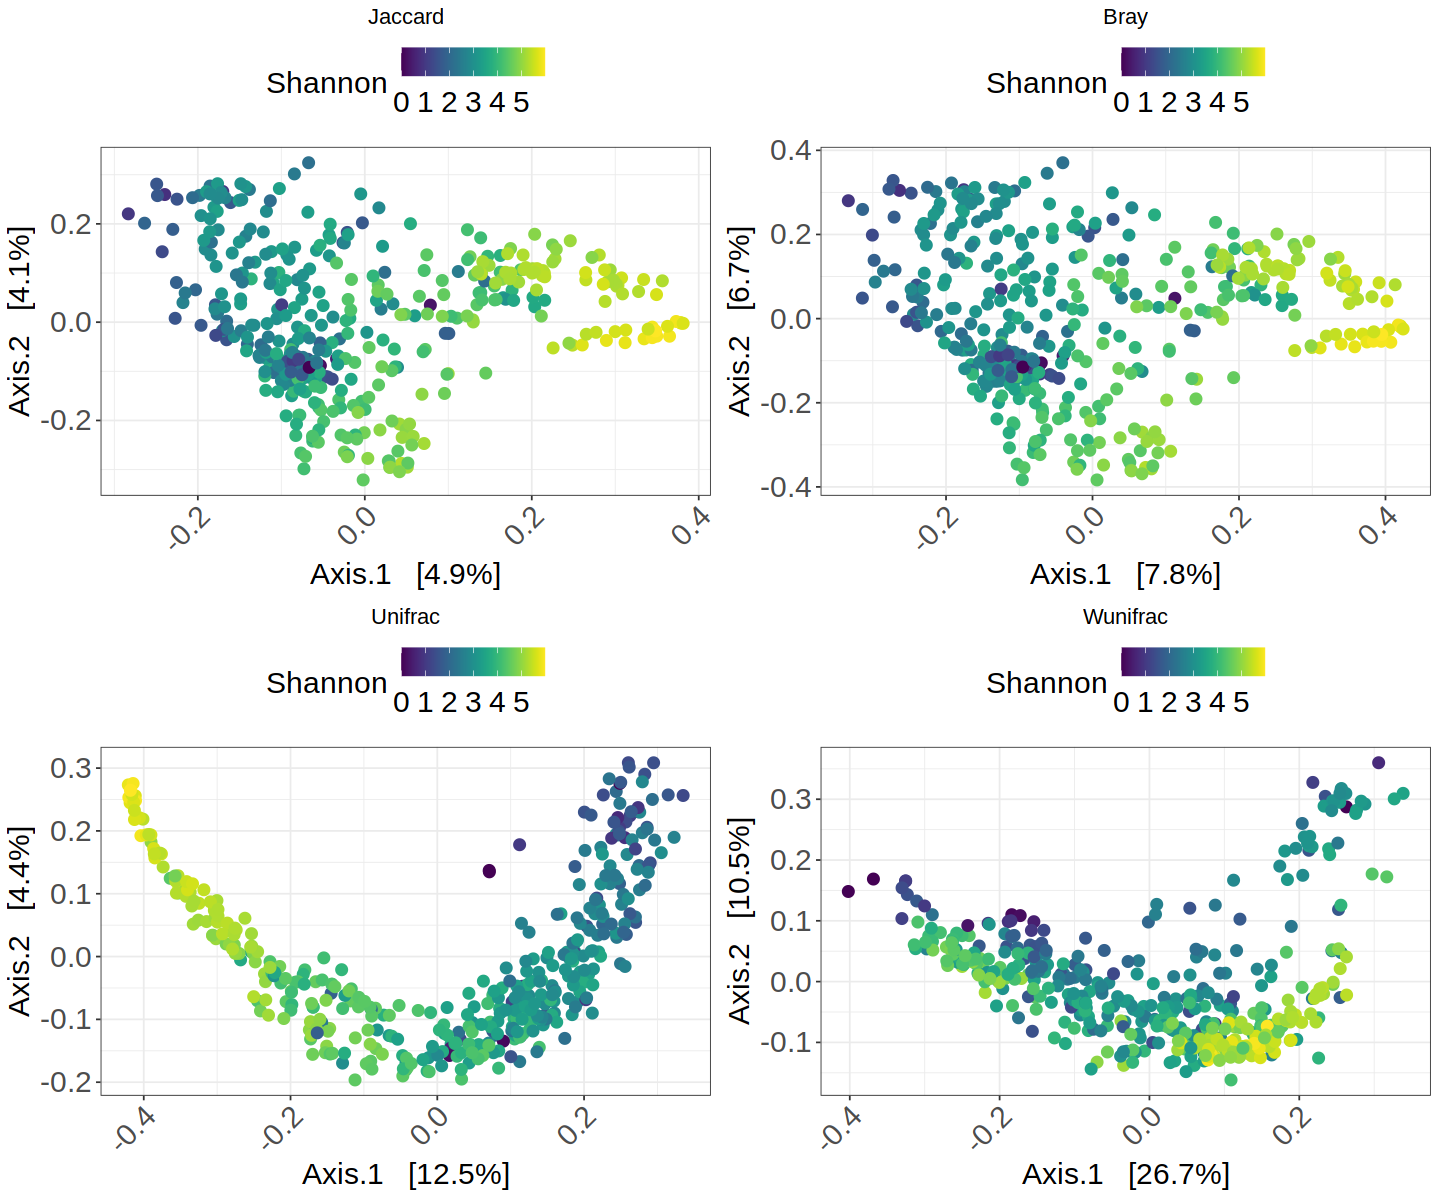

In [72]:
options(repr.plot.width=12,repr.plot.height=10)
grid.arrange(jaccard.shannon,
             bray.shannon,
             unifrac.shannon,
             wunifrac.shannon,
             nrow=2)

In [74]:
#Generate plots - coloring by Shannon index
jaccard.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,jaccard.dist.filt,"Shannon",axes = c(2,3))
bray.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,bray.dist.filt,"Shannon",axes = c(2,3))
unifrac.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,unifrac.dist.filt,"Shannon",axes = c(2,3))
wunifrac.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,wunifrac.dist.filt,"Shannon",axes = c(2,3))

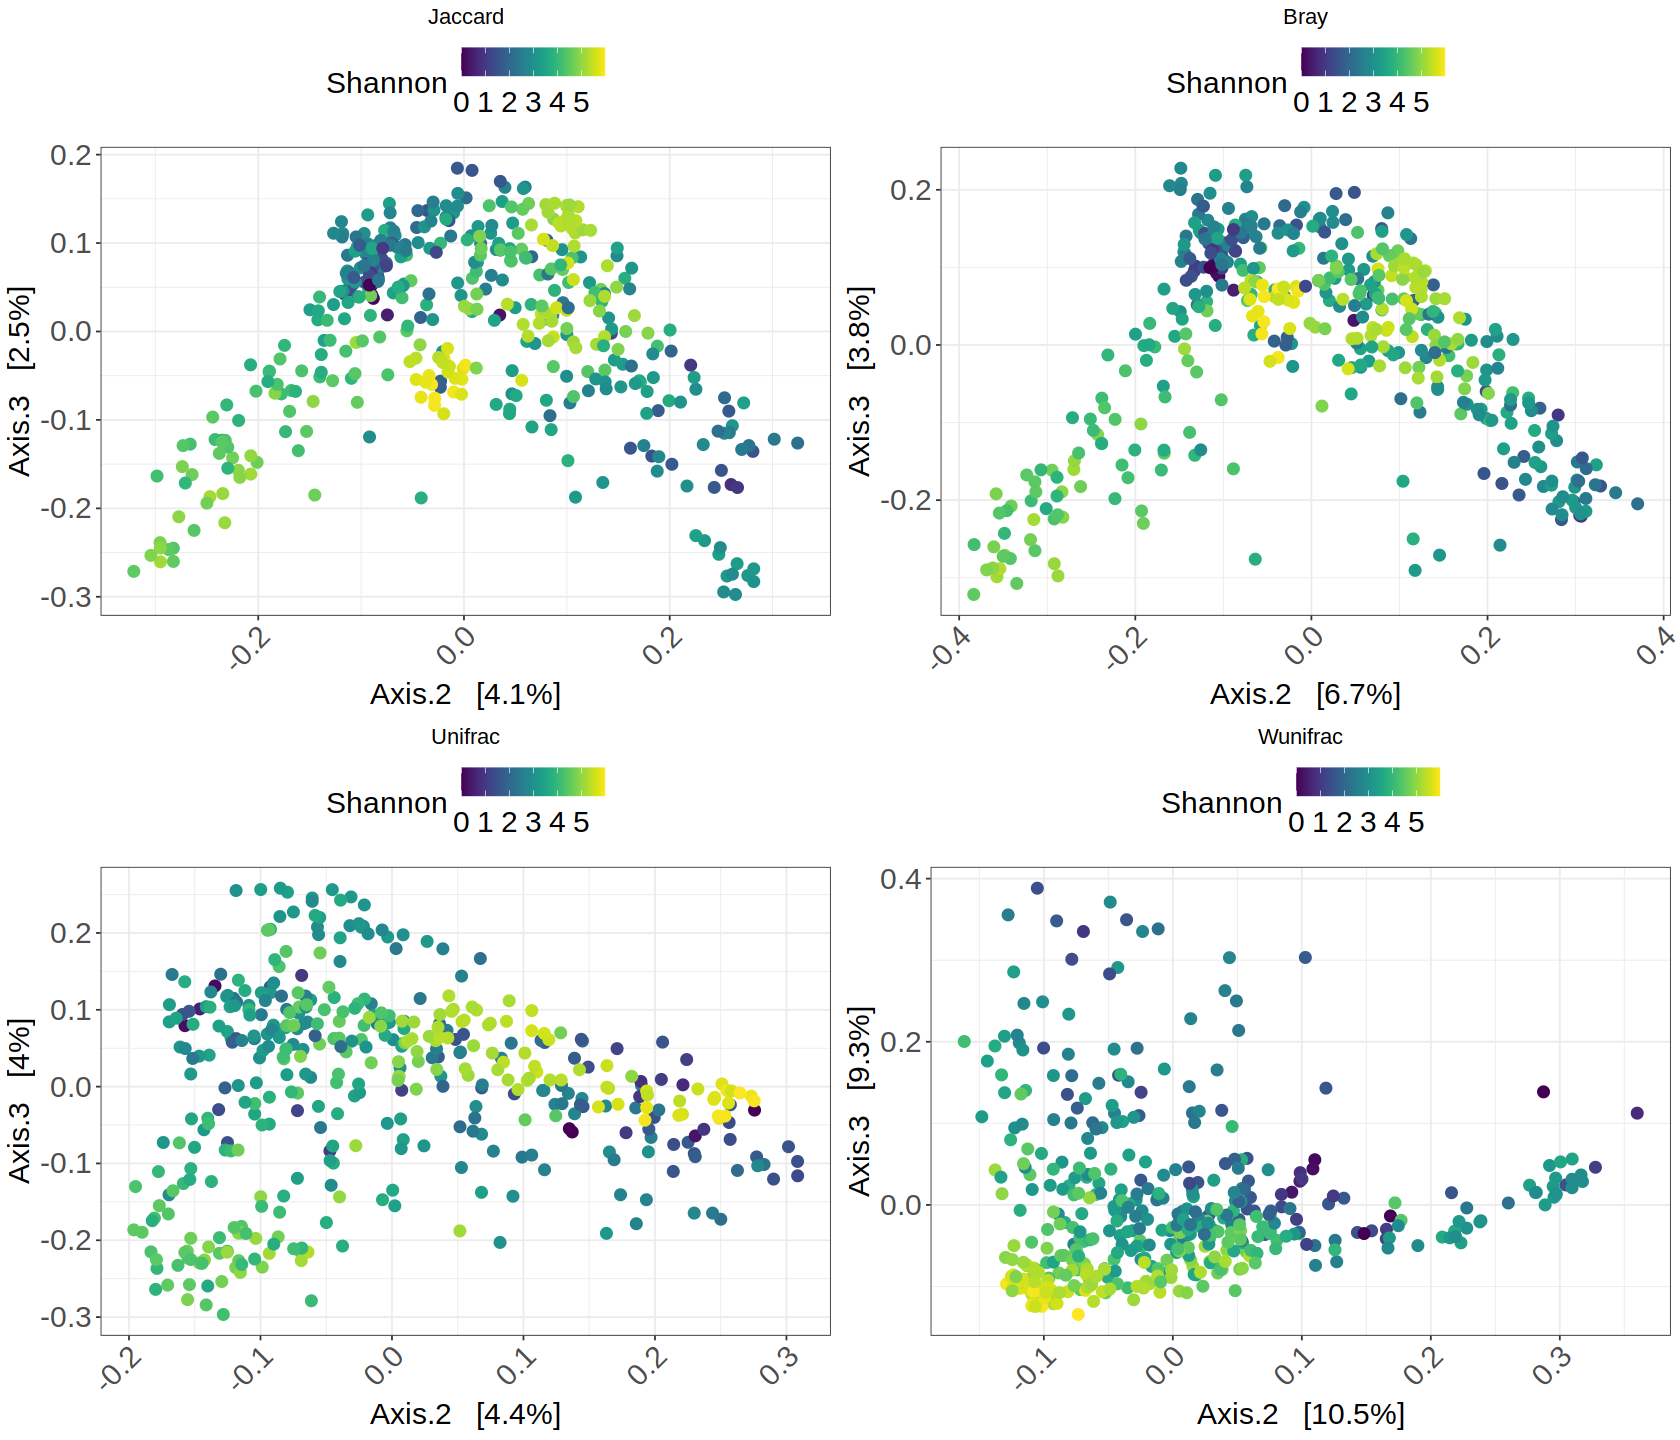

In [75]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.shannon.pca1.3,
             bray.shannon.pca1.3,
             unifrac.shannon.pca1.3,
             wunifrac.shannon.pca1.3,
             nrow=2)

### Pairwise dissimilarities

#### By biome_1

In [76]:
dist.method = c("jaccard","bray","unifrac","wunifrac")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3207] is not a sub-multiple or multiple of the number of rows [1604]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3207] is not a sub-multiple or multiple of the number of rows [1604]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]

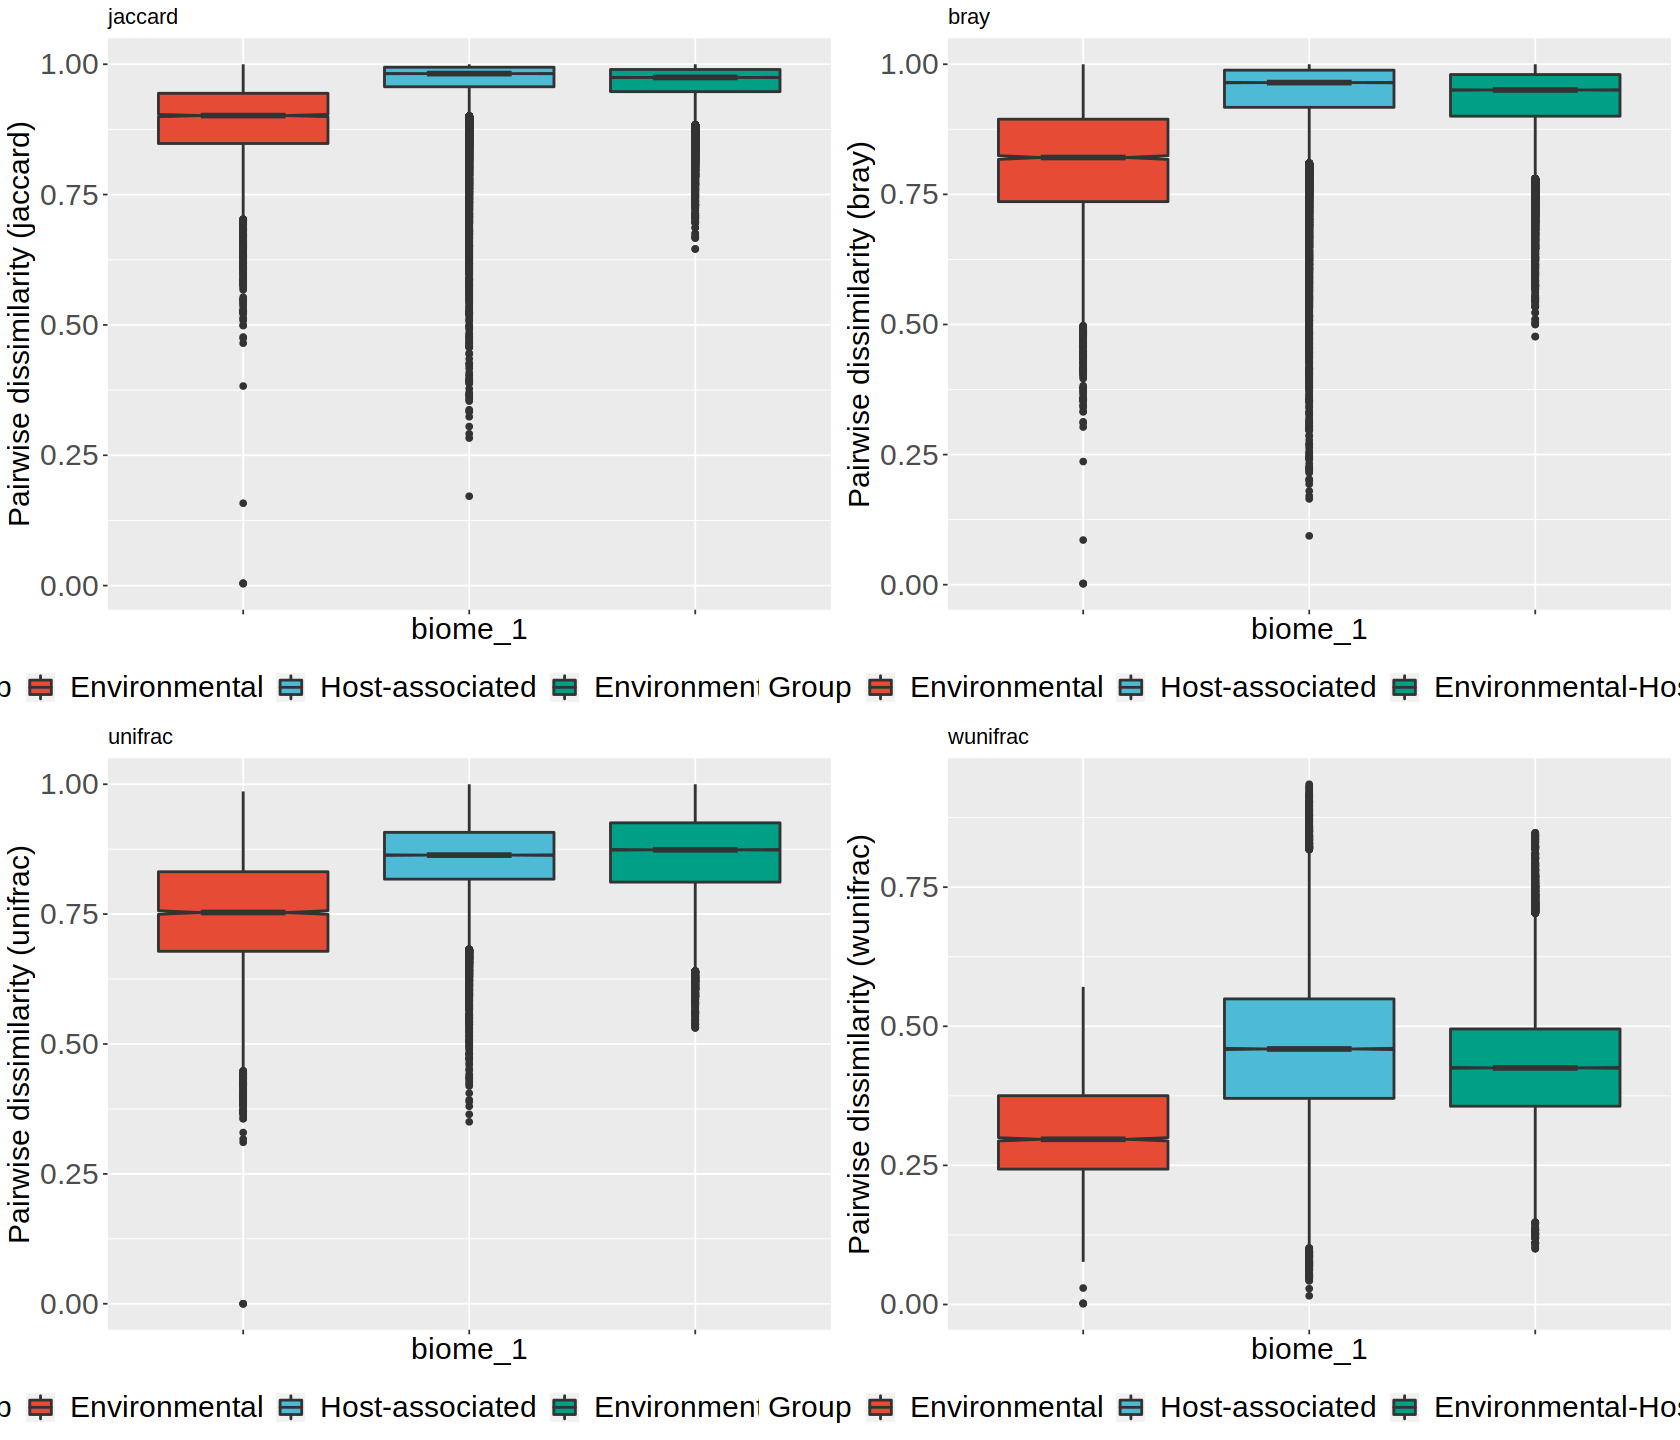

In [77]:
diss.plots.cat = compute_dissimilarity_groups_plots(filter_taxa_All_count,dist.method,"biome_1")

In [78]:
diss.plots.cat

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

In [79]:
#Produce dissim.plot by metric
#diss.jacc1=phyloseq_group_dissimilarity(filter_taxa_All_count,group="biome_1",method="jaccard",between_groups = TRUE)+ggtitle("Jaccard")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

#### By category

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3209] is not a sub-multiple or multiple of the number of rows [1605]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3207] is not a sub-multiple or multiple of the number of rows [1604]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3209] is not a sub-multiple or multiple of the number of rows [1605]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3207] is not a sub-multiple or multiple of the number of rows [1604]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]

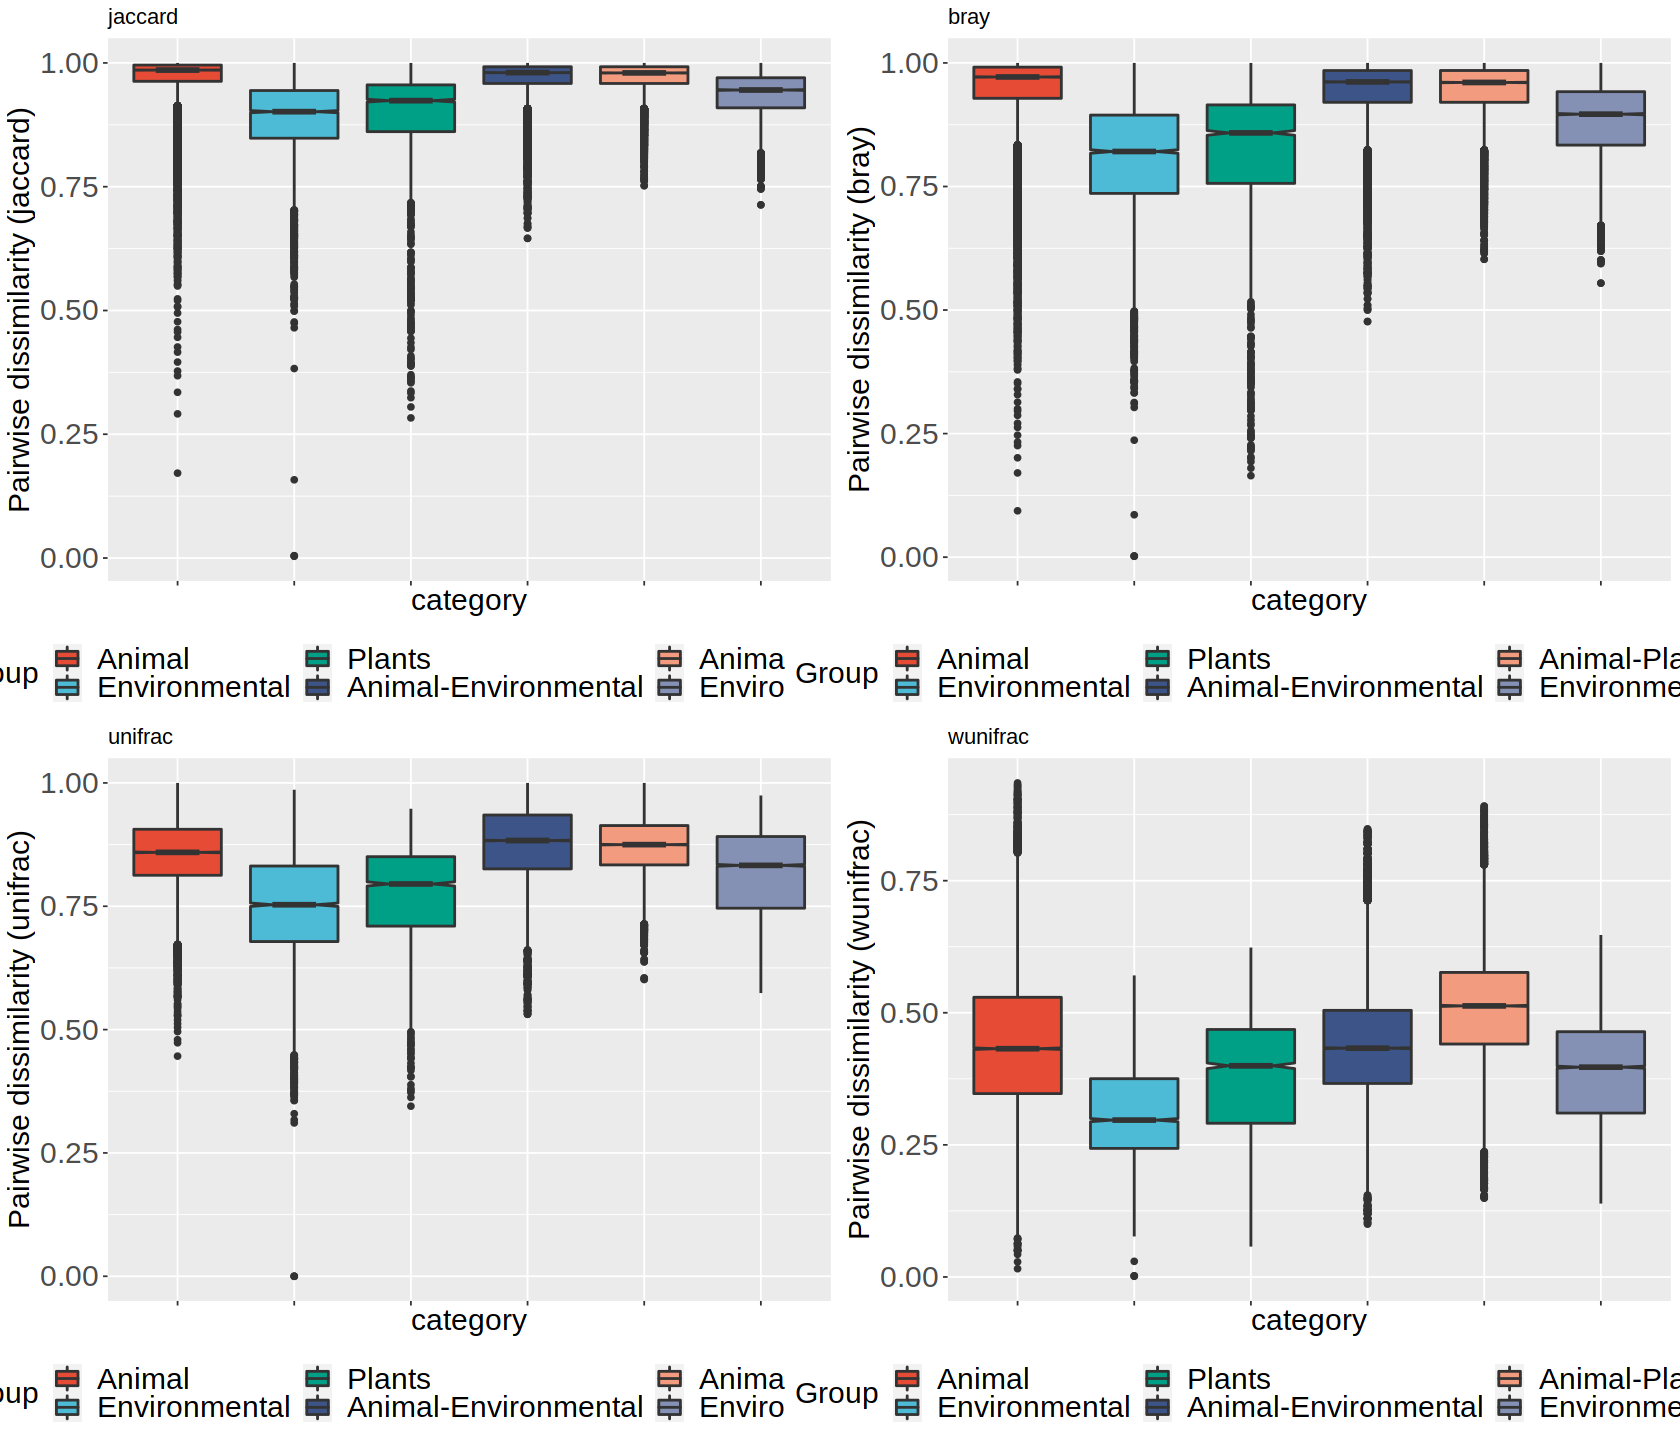

In [80]:
diss.plots.biome1 = compute_dissimilarity_groups_plots(filter_taxa_All_count,dist.method,"category")

### OTU tree

In [81]:
otu.tre=plot_tree(filter_taxa_All_count,color="category",label.tips="taxa_names")+scale_color_npg()

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


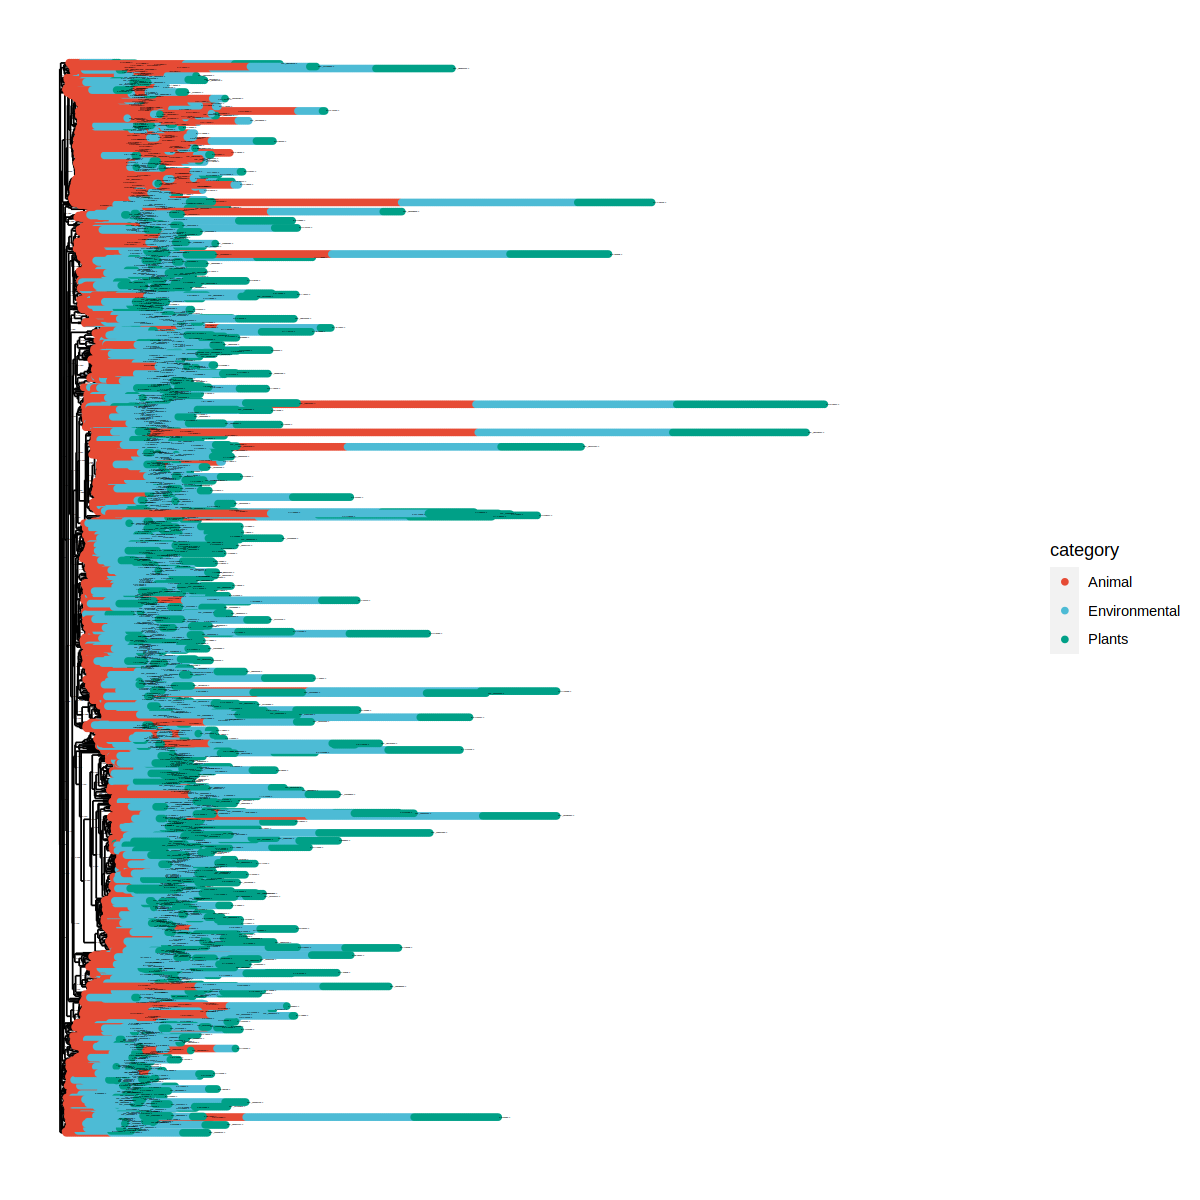

In [82]:
options(repr.plot.width=10,repr.plot.height=10)
otu.tre

In [84]:
tre.top.0.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=1),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.top.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=3),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 3%")

tre.top.5=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=5),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.top.10=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=10),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


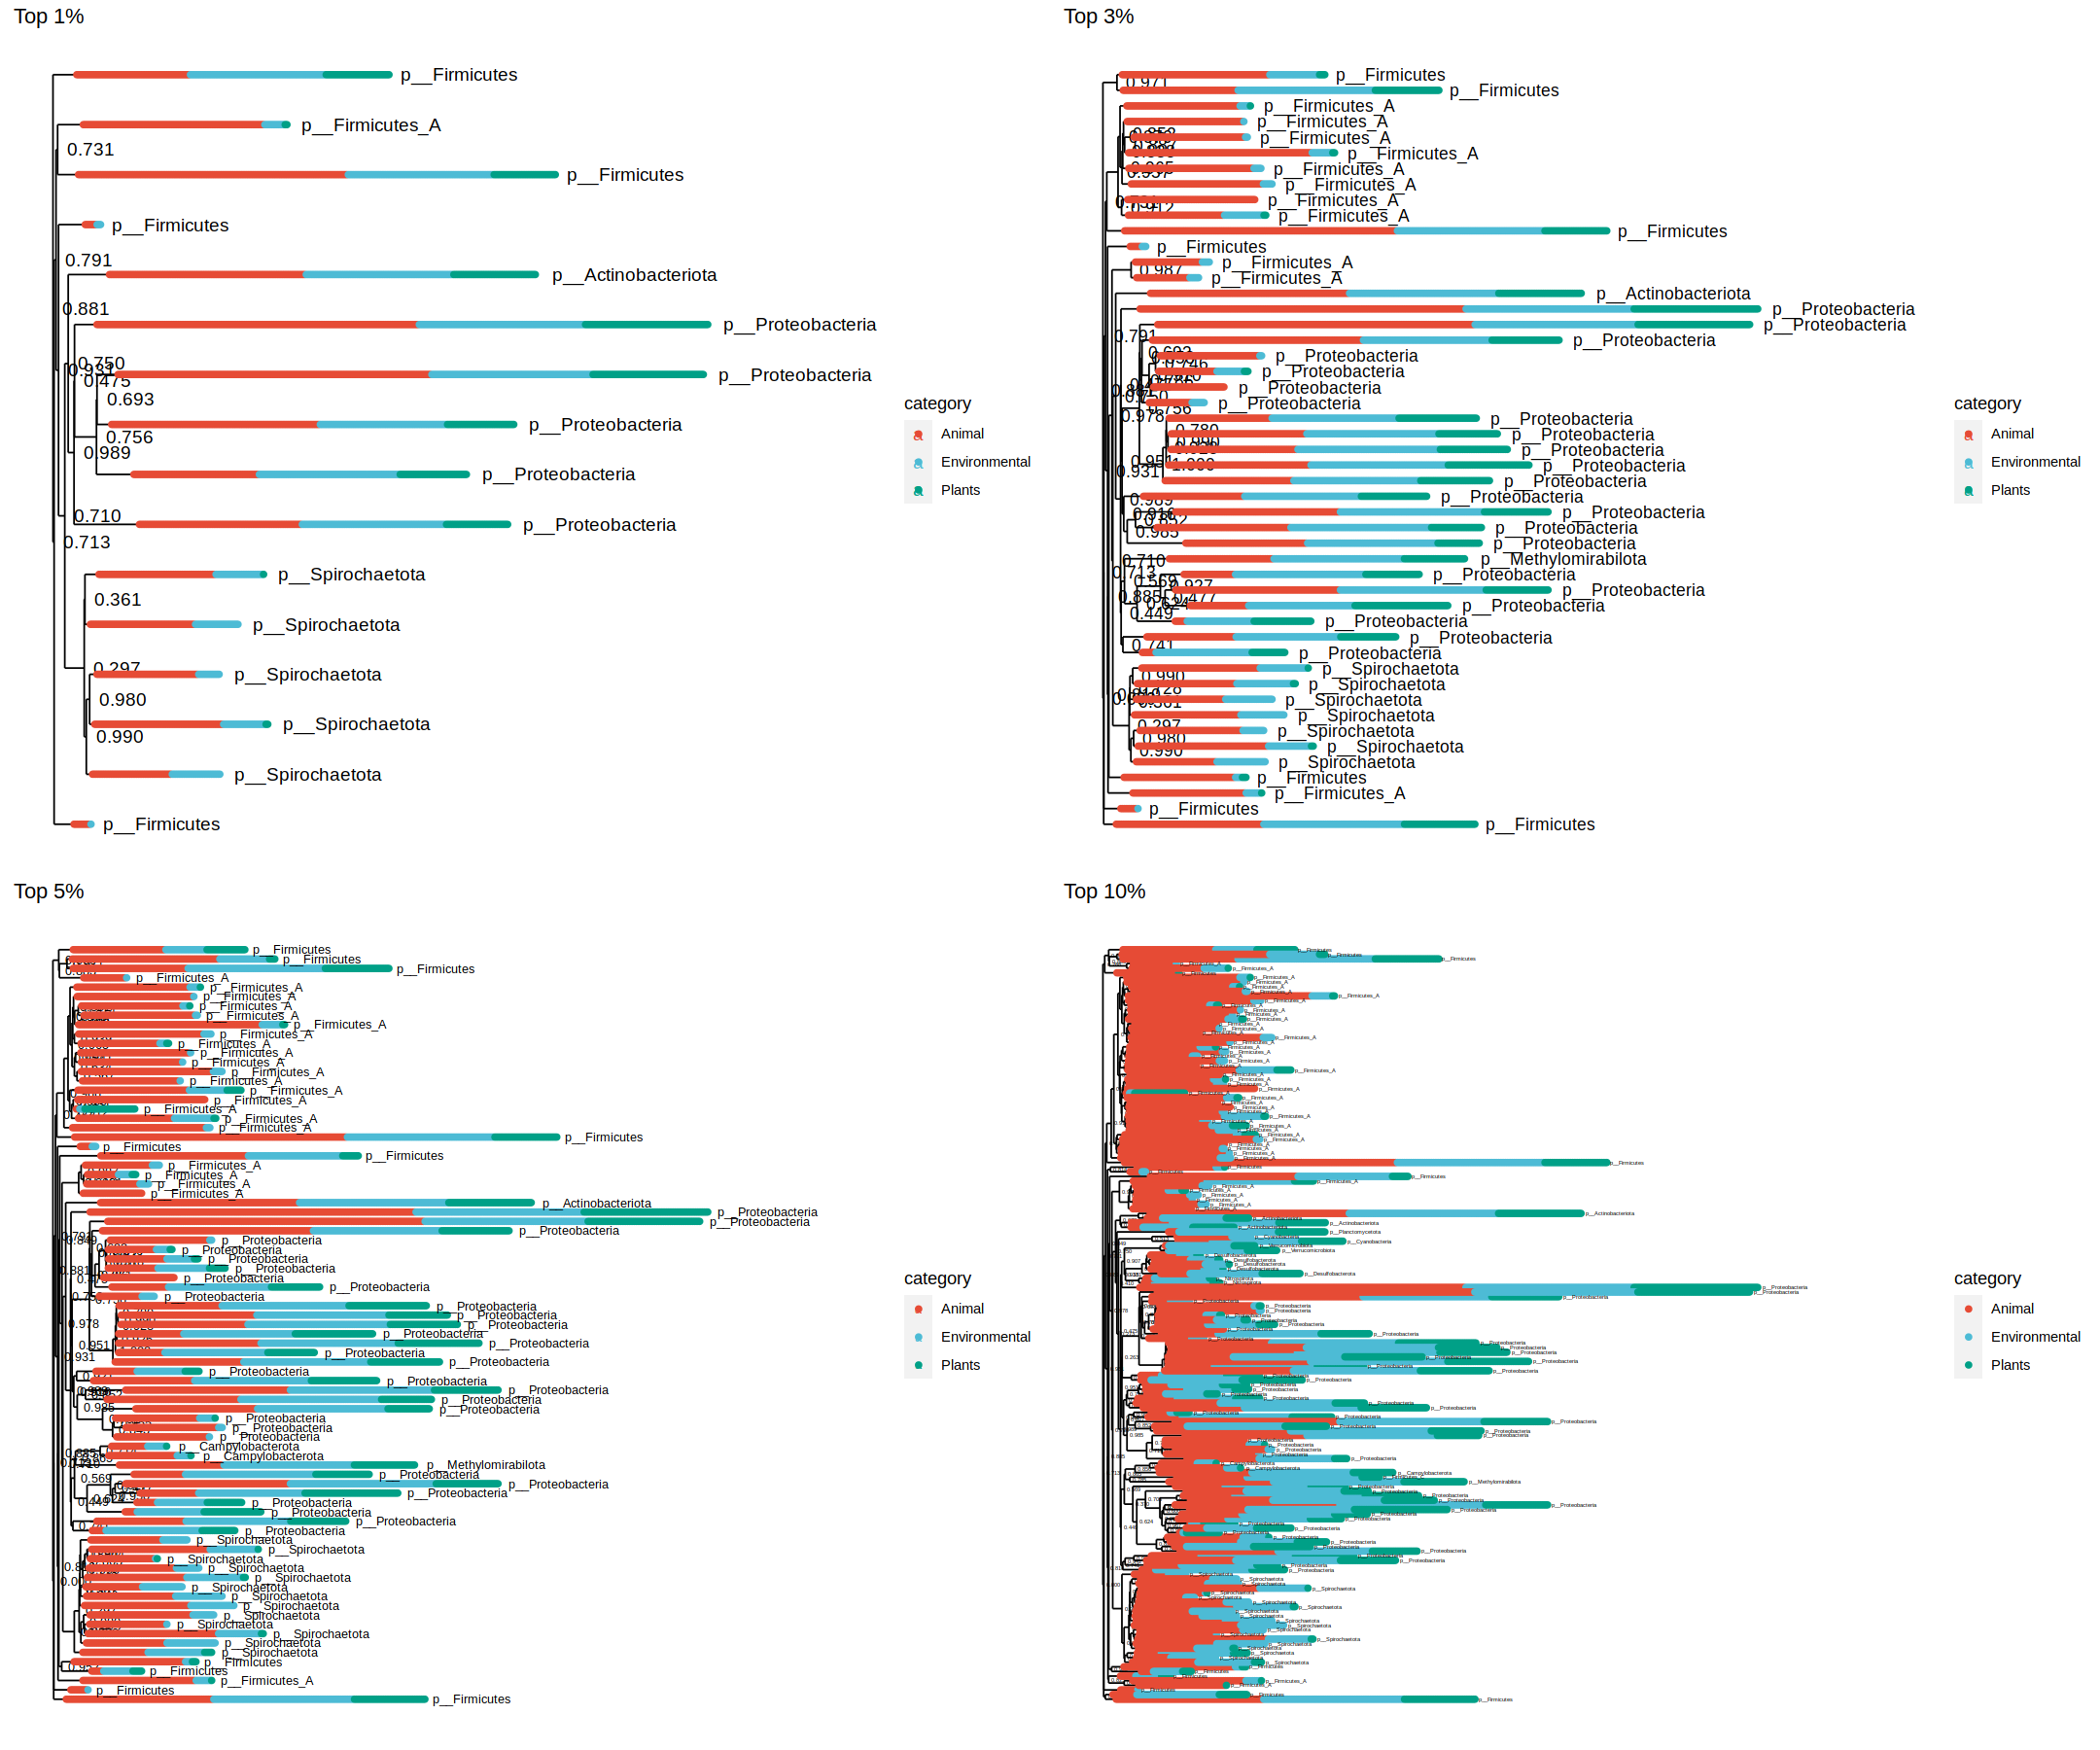

In [85]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.top.0.1,
             tre.top.1,
             tre.top.5,
             tre.top.10,
             nrow=2)

### Plot OTUs network

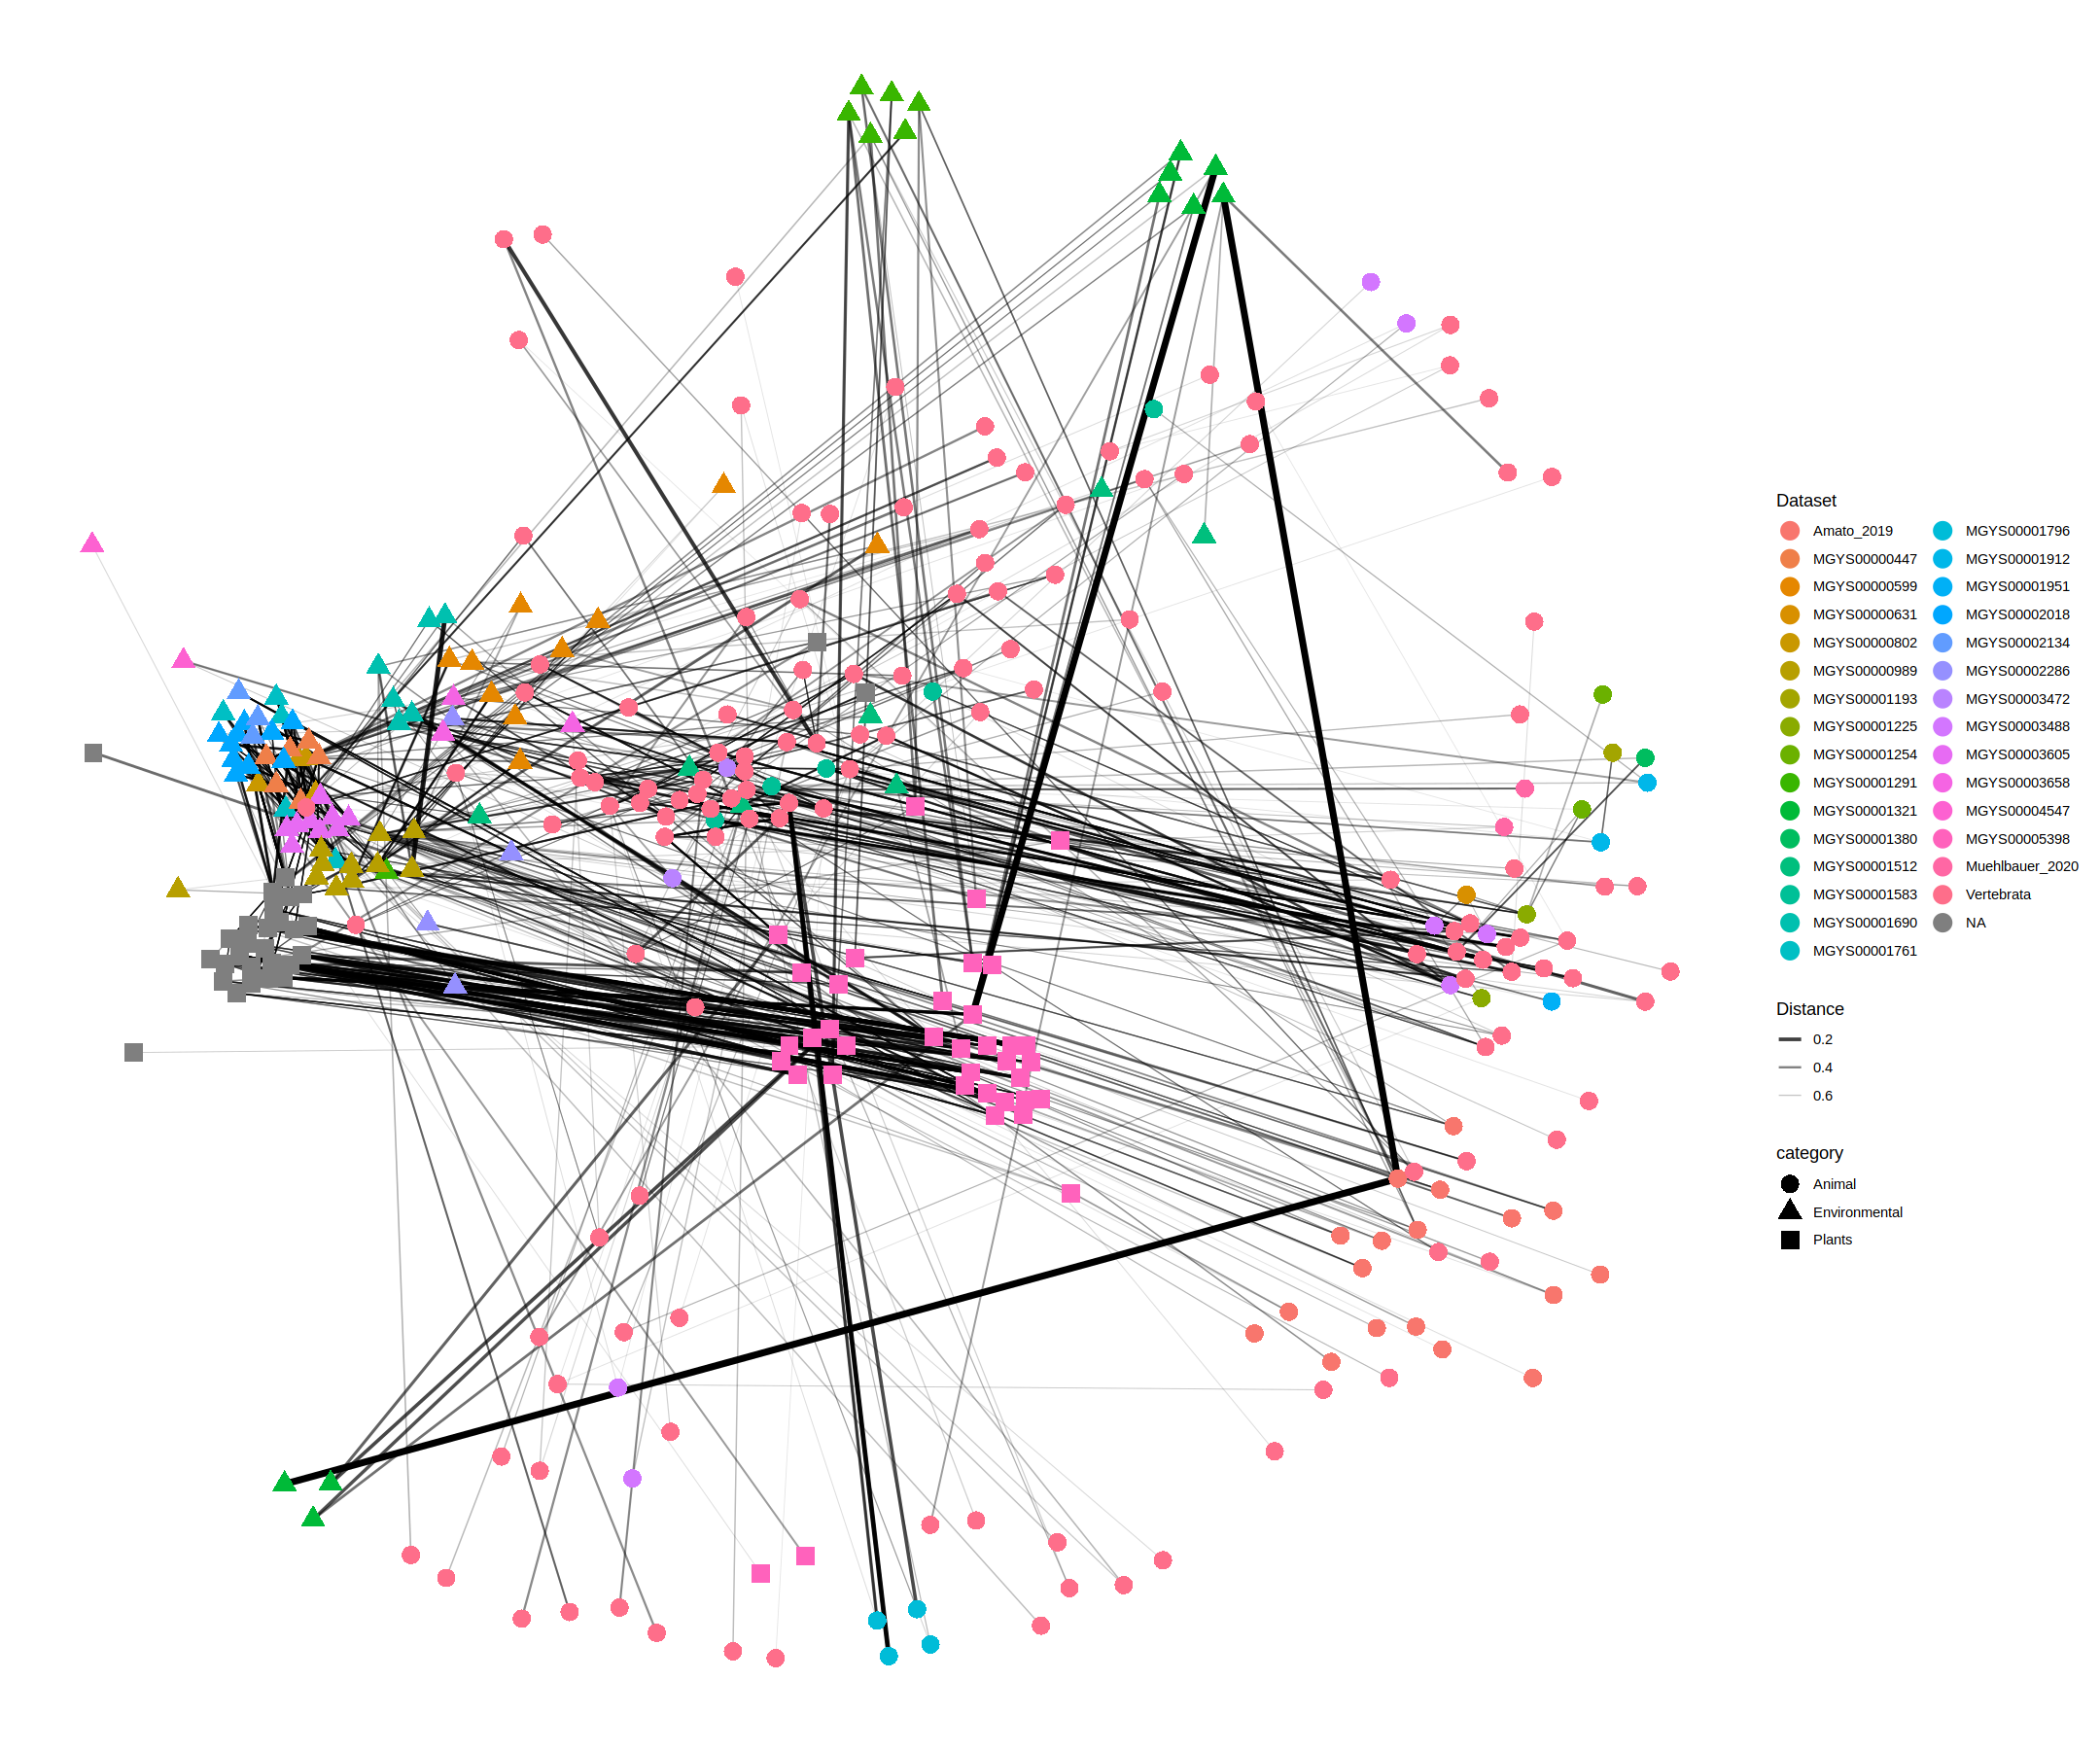

In [86]:
plot_net(filter_taxa_All_count, maxdist=0.7, color="Dataset", shape="category")

In [87]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/Flagellin_Diversity/miniconda/envs/py3_fla_2022/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] vegan_2.6-4       lattice_0.20-45   cowplot_1.1.1     knitr_1.40       
 [5] permute_0.9-7     gridExtra_2.3     conflicted_1.2.0  viridis_0.6.2    
 [9] viridisLite_0.4.1 ggsci_3.0.0       metagMisc_0.0.4   microViz_0.9.6   
[13] phyloseq_1.42.0   lubridate_1.8.0   forcats_1.0.0     stringr_1.4.1    
[17] dp